In [27]:
import numpy as np
import pandas as pd
import scipy
import json

In [28]:
pd.options.display.max_rows = 20
pd.set_option('display.max_columns', None)

In [29]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
from matplotlib import cm
import seaborn as sns

-------

In [30]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
date

'2023-11-01'

-------

# Results Figures

### Load Results

In [31]:
results_dir = './results/'

---------

In [32]:
with open('analysis-config.json') as cfg_json:
    viz_config = json.load(cfg_json)
viz_config

{'exclude_timepts': [0],
 'pseudocount_value': 0.5,
 'min_trustworthy_count': 300,
 'max_trustworthy_count': 99999999999999,
 'min_num_trustworthy_assays': 0,
 'init_bias_prevalence_mean': 0,
 'init_bias_prevalence_stdev': 0.01,
 'init_bias_susceptibility_mean': 0,
 'init_bias_susceptibility_stdev': 0.01,
 'regression_weight_saturation_count': 300,
 'sample_bias_penalty': 1,
 'variant_bias_penalty': 3,
 'target_bias_prevalence_stdev': 0.1,
 'min_mean_count_linear_fits': 25}

In [33]:
viz_samplesInfo = pd.read_csv(results_dir+'samples_final.csv')
viz_samplesInfo

,kinsler_sample_label,sample,assay,treatment,rep,timept,total_raw_count,bias_prevalence,normalization_factor
0,A0,M3-R1-T0,M3-R1,M3,1,0,3347507.0,0.002644,NaN
1,A1,M3-R1-T1,M3-R1,M3,1,1,4885816.0,-0.082151,4852.422343
2,A2,M3-R1-T2,M3-R1,M3,1,2,8910028.0,-0.093178,6287.282023
3,A3,M3-R1-T3,M3-R1,M3,1,3,1036411.0,0.085670,464.925458
4,A4,M3-R1-T4,M3-R1,M3,1,4,5206525.0,0.089659,1482.000000
...,...,...,...,...,...,...,...,...,...
164,O0,0.2MKCl-R1-T0,0.2MKCl-R1,0.2MKCl,1,0,4797684.0,0.001078,NaN
165,O1,0.2MKCl-R1-T1,0.2MKCl-R1,0.2MKCl,1,1,2930331.0,-0.153000,4282.053371
166,O2,0.2MKCl-R1-T2,0.2MKCl-R1,0.2MKCl,1,2,2883775.0,-0.043091,4154.584575
167,O3,0.2MKCl-R1-T3,0.2MKCl-R1,0.2MKCl,1,3,296368.0,0.191788,405.351015


In [34]:
viz_variantsInfo = pd.read_csv(results_dir+'variants_final.csv')
viz_variantsInfo

,Unnamed: 0,additional_muts,barcode,class,gene,ploidy,type,barcode_sequence,barcode_GCratio,neutral_group,control_set,bias_susceptibility
0,0,TIP1-upstream_point_variant; YKR012C-upstream_...,53,Diploid,Diploid,Diploid,Diploid,AACGTAAGTCTAAACGTATTTGAGAA,0.307692,Diploid,True,-0.160235
1,1,SEH1-missense_variant; ZIP1-missense_variant; ...,151,PKA,IRA1,Haploid,stop_gained,TCCATAATTGGGAATTGGATTTTGGC,0.384615,NaN,False,-0.098071
2,2,NotSequenced,262,NotSequenced,NotSequenced,NotSequenced,NotSequenced,TTAATAAACAAGAAACGGGTTGTGGA,0.346154,NaN,False,-0.036233
3,3,None,273,PKA,IRA1,Haploid,frameshift_variant,TCACTAAGAAGGAAGTCCATTATTAC,0.346154,NaN,False,-0.021975
4,4,NotSequenced,323,NotSequenced,NotSequenced,NotSequenced,NotSequenced,AGCCAAAAAAGTAATATTTTTGACCA,0.269231,NaN,False,0.220303
...,...,...,...,...,...,...,...,...,...,...,...,...
544,544,None,9000106,PKA,IRA1,Haploid,stop_gained,NaN,NaN,NaN,False,1.109774
545,545,None,9000107,PKA,IRA1,Haploid,stop_gained,NaN,NaN,NaN,False,0.109003
546,546,None,9000108,PKA,IRA1,Haploid,stop_gained,NaN,NaN,NaN,False,-0.063119
547,547,None,9000109,PKA,IRA1,Haploid,stop_gained,NaN,NaN,NaN,False,0.920345


In [35]:
viz_trustworthy = pd.read_csv(results_dir+'trustworthy_final.csv')
viz_trustworthy

,M3-R1,M3-R2,M3-R3,M3-R4,EC3-R1,EC3-R2,EC3-R3,EC23-R1,EC23-R2,EC23-R3,EC21-R1,EC21-R2,EC21-R3,EC20-R1,EC20-R2,EC20-R3,EC18-R1,EC18-R2,EC18-R3,EC13-R1,EC13-R2,EC13-R3,Baffled-R1,Baffled-R2,1.8%Gluc-R1,1.8%Gluc-R2,1.6%Gluc-R1,1.6%Gluc-R2,1.5%Suc1%Raf-R1,1.4%Gluc-R1,1.4%Gluc-R2,0.5MKCl-R1,0.5%Raf-R1,0.5%Raf-R2,0.2MKCl-R1,bias_susceptibility
0,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,False,False,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,True,False,True
545,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,True,False,True
546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
547,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,True,False,True


In [36]:
viz_counts = pd.read_csv(results_dir+'counts_initial.csv')
viz_counts

,M3-R1-T0,M3-R1-T1,M3-R1-T2,M3-R1-T3,M3-R1-T4,M3-R2-T0,M3-R2-T1,M3-R2-T2,M3-R2-T3,M3-R2-T4,M3-R3-T0,M3-R3-T1,M3-R3-T2,M3-R3-T3,M3-R3-T4,M3-R4-T0,M3-R4-T1,M3-R4-T2,M3-R4-T3,M3-R4-T4,EC3-R1-T0,EC3-R1-T1,EC3-R1-T2,EC3-R1-T3,EC3-R1-T4,EC3-R2-T0,EC3-R2-T1,EC3-R2-T2,EC3-R2-T3,EC3-R2-T4,EC3-R3-T0,EC3-R3-T1,EC3-R3-T2,EC3-R3-T3,EC3-R3-T4,EC23-R1-T0,EC23-R1-T1,EC23-R1-T2,EC23-R1-T3,EC23-R1-T4,EC23-R2-T0,EC23-R2-T1,EC23-R2-T2,EC23-R2-T3,EC23-R2-T4,EC23-R3-T0,EC23-R3-T1,EC23-R3-T2,EC23-R3-T3,EC23-R3-T4,EC21-R1-T0,EC21-R1-T1,EC21-R1-T2,EC21-R1-T3,EC21-R1-T4,EC21-R2-T0,EC21-R2-T1,EC21-R2-T2,EC21-R2-T3,EC21-R2-T4,EC21-R3-T0,EC21-R3-T1,EC21-R3-T2,EC21-R3-T3,EC21-R3-T4,EC20-R1-T0,EC20-R1-T1,EC20-R1-T2,EC20-R1-T3,EC20-R2-T0,EC20-R2-T1,EC20-R2-T2,EC20-R2-T3,EC20-R3-T0,EC20-R3-T1,EC20-R3-T2,EC20-R3-T3,EC18-R1-T0,EC18-R1-T1,EC18-R1-T2,EC18-R1-T3,EC18-R2-T0,EC18-R2-T1,EC18-R2-T2,EC18-R2-T3,EC18-R3-T0,EC18-R3-T1,EC18-R3-T2,EC18-R3-T3,EC13-R1-T0,EC13-R1-T1,EC13-R1-T2,EC13-R1-T3,EC13-R1-T4,EC13-R2-T0,EC13-R2-T1,EC13-R2-T2,EC13-R2-T3,EC13-R2-T4,EC13-R3-T0,EC13-R3-T1,EC13-R3-T2,EC13-R3-T3,EC13-R3-T4,Baffled-R1-T0,Baffled-R1-T1,Baffled-R1-T2,Baffled-R1-T3,Baffled-R1-T4,Baffled-R2-T0,Baffled-R2-T1,Baffled-R2-T2,Baffled-R2-T3,Baffled-R2-T4,1.8%Gluc-R1-T0,1.8%Gluc-R1-T1,1.8%Gluc-R1-T2,1.8%Gluc-R1-T3,1.8%Gluc-R1-T4,1.8%Gluc-R2-T0,1.8%Gluc-R2-T1,1.8%Gluc-R2-T2,1.8%Gluc-R2-T3,1.8%Gluc-R2-T4,1.6%Gluc-R1-T0,1.6%Gluc-R1-T1,1.6%Gluc-R1-T2,1.6%Gluc-R1-T3,1.6%Gluc-R1-T4,1.6%Gluc-R2-T0,1.6%Gluc-R2-T1,1.6%Gluc-R2-T2,1.6%Gluc-R2-T3,1.6%Gluc-R2-T4,1.5%Suc1%Raf-R1-T0,1.5%Suc1%Raf-R1-T1,1.5%Suc1%Raf-R1-T2,1.5%Suc1%Raf-R1-T3,1.5%Suc1%Raf-R1-T4,1.4%Gluc-R1-T0,1.4%Gluc-R1-T1,1.4%Gluc-R1-T2,1.4%Gluc-R1-T3,1.4%Gluc-R1-T4,1.4%Gluc-R2-T0,1.4%Gluc-R2-T1,1.4%Gluc-R2-T2,1.4%Gluc-R2-T3,1.4%Gluc-R2-T4,0.5MKCl-R1-T0,0.5MKCl-R1-T1,0.5MKCl-R1-T2,0.5MKCl-R1-T3,0.5MKCl-R1-T4,0.5%Raf-R1-T0,0.5%Raf-R1-T1,0.5%Raf-R1-T2,0.5%Raf-R1-T3,0.5%Raf-R1-T4,0.5%Raf-R2-T0,0.5%Raf-R2-T1,0.5%Raf-R2-T2,0.5%Raf-R2-T3,0.5%Raf-R2-T4,0.2MKCl-R1-T0,0.2MKCl-R1-T1,0.2MKCl-R1-T2,0.2MKCl-R1-T3,0.2MKCl-R1-T4
0,5430.0,6191.0,8361.0,574.0,2148.0,18106.0,2775.0,17050.0,10057.0,18295.0,2367.0,8268.0,15562.0,1846.0,11209.0,2722.0,5916.0,3468.0,3720.0,2945.0,111.0,244.0,183.0,81.0,101.0,111.0,376.0,164.0,95.0,69.0,111.0,223.0,177.0,104.0,79.0,2786.0,2019.0,2104.0,1529.0,1172.0,2786.0,2406.0,2892.0,2292.0,1750.0,2786.0,1856.0,2817.0,1772.0,1686.0,3276.0,962.0,1883.0,985.0,1025.0,3276.0,760.0,574.0,1144.0,1070.0,3276.0,1889.0,1691.0,1945.0,1302.0,773.0,2785.0,1855.0,954.0,2336.0,2493.0,1569.0,1495.0,2192.0,2199.0,1775.0,1990.0,90.0,40.0,365.0,486.0,133.0,65.0,102.0,516.0,122.0,481.0,574.0,380.0,2.0,512.0,594.0,319.0,51.0,2.0,700.0,403.0,299.0,70.0,2.0,594.0,104.0,361.0,59.0,5251.0,11213.0,3158.0,908.0,4044.0,3315.0,8696.0,4901.0,7853.0,4079.0,6639.0,6157.0,2544.0,380.0,466.0,1539.0,4670.0,2662.0,363.0,341.0,56.0,121.0,113.0,120.0,245.0,56.0,102.0,212.0,146.0,116.0,3758.0,1879.0,442.0,299.0,607.0,1065.0,5289.0,1933.0,249.0,495.0,1239.0,4131.0,1553.0,150.0,235.0,7391.0,11230.0,6963.0,1183.0,1828.0,5659.0,2713.0,3435.0,198.0,236.0,5765.0,3076.0,1751.0,167.0,193.0,8704.0,6361.0,7231.0,780.0,1934.0
1,102665.0,165765.0,422624.0,62916.0,367191.0,200215.0,66810.0,915046.0,1357544.0,4230603.0,36142.0,224264.0,751263.0,187575.0,1956473.0,23585.0,121243.0,138770.0,293532.0,443175.0,48524.0,54722.0,102971.0,101137.0,217453.0,48524.0,88884.0,127795.0,187235.0,209290.0,48524.0,49070.0,95476.0,150720.0,229493.0,16449.0,18428.0,40070.0,57945.0,83239.0,16449.0,21698.0,42476.0,64251.0,93228.0,16449.0,16341.0,40354.0,43842.0,73539.0,23186.0,14470.0,50457.0,47319.0,79224.0,23186.0,11899.0,16668.0,49533.0,76326.0,23186.0,27178.0,36587.0,58512.0,70336.0,5215.0,26566.0,35823.0,34463.0,14656.0,24995.0,31769.0,49171.0,12802.0,21013.0,25010.0,41128.0,22844.0,6260.0,179028.0,491772.0,14132.0,14745.0,49741.0,661420.0,7847.0,66171.0,171156.0,367527.0,2625.0,43106.0,160273.0,399304.0,223043.0,2625.0,54385.0,107883.0,308884.0,241795.0,2625.0,42068.0,2053

---------

In [37]:
goodForVizDf = pd.DataFrame(index=viz_trustworthy.index, columns=viz_trustworthy.columns)
for assay in viz_samplesInfo['assay'].unique():
    assayInfo = viz_samplesInfo.loc[(viz_samplesInfo['assay'] == assay) & (~viz_samplesInfo['timept'].isin(viz_config['exclude_timepts']))].sort_values(by='timept')
    samples_a = assayInfo['sample'].unique()
    mean_counts_a = viz_counts[samples_a].mean(axis=1).values
    goodForVizDf.loc[:, assay] = (mean_counts_a > 25)
viz_variants = np.where(goodForVizDf.all(axis=1))[0]
    
print(viz_variants, len(viz_variants))

[  0   1   2   3   4   5   9  12  13  14  15  16  17  18  19  20  21  23
  24  25  26  28  30  33  34  35  37  38  39  40  41  42  43  44  46  47
  48  49  51  52  54  55  56  57  59  60  61  62  63  64  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  82  87  88  89  90  91  92  95
  96  97  98  99 100 101 102 103 105 106 107 108 109 111 115 117 118 119
 120 121 122 123 124 125 126 127 129 130 132 133 134 136 138 139 140 142
 144 145 146 147 148 149 150 152 153 156 158 162 164 166 167 168 169 172
 173 175 176 177 179 180 181 183 184 185 186 187 188 189 190 191 193 194
 195 196 197 198 199 200 202 203 205 206 207 208 209 213 214 215 216 217
 219 220 221 222 226 228 229 230 231 232 234 235 236 237 238 240 241 243
 245 246 247 249 250 252 253 254 255 256 257 259 260 261 262 263 264 265
 266 267 270 271 272 273 274 276 277 278 279 280 282 283 284 285 286 287
 290 291 292 294 295 296 297 299 300 302 303 304 305 306 307 308 309 310
 311 314 315 317 318 319 321 326 327 328 329 330 33

In [38]:
viz_biassusc_final = viz_variantsInfo['bias_susceptibility'].values
with np.printoptions(threshold=100): print(viz_biassusc_final)

[-0.16023495 -0.0980709  -0.03623327 ... -0.06311914  0.92034473
  0.39598589]


In [39]:
viz_biasprev_final = pd.DataFrame(dict(zip(viz_samplesInfo['sample'], viz_samplesInfo['bias_prevalence'])), index=[0])
viz_biasprev_final

,M3-R1-T0,M3-R1-T1,M3-R1-T2,M3-R1-T3,M3-R1-T4,M3-R2-T0,M3-R2-T1,M3-R2-T2,M3-R2-T3,M3-R2-T4,M3-R3-T0,M3-R3-T1,M3-R3-T2,M3-R3-T3,M3-R3-T4,M3-R4-T0,M3-R4-T1,M3-R4-T2,M3-R4-T3,M3-R4-T4,EC3-R1-T0,EC3-R1-T1,EC3-R1-T2,EC3-R1-T3,EC3-R1-T4,EC3-R2-T0,EC3-R2-T1,EC3-R2-T2,EC3-R2-T3,EC3-R2-T4,EC3-R3-T0,EC3-R3-T1,EC3-R3-T2,EC3-R3-T3,EC3-R3-T4,EC23-R1-T0,EC23-R1-T1,EC23-R1-T2,EC23-R1-T3,EC23-R1-T4,EC23-R2-T0,EC23-R2-T1,EC23-R2-T2,EC23-R2-T3,EC23-R2-T4,EC23-R3-T0,EC23-R3-T1,EC23-R3-T2,EC23-R3-T3,EC23-R3-T4,EC21-R1-T0,EC21-R1-T1,EC21-R1-T2,EC21-R1-T3,EC21-R1-T4,EC21-R2-T0,EC21-R2-T1,EC21-R2-T2,EC21-R2-T3,EC21-R2-T4,EC21-R3-T0,EC21-R3-T1,EC21-R3-T2,EC21-R3-T3,EC21-R3-T4,EC20-R1-T0,EC20-R1-T1,EC20-R1-T2,EC20-R1-T3,EC20-R2-T0,EC20-R2-T1,EC20-R2-T2,EC20-R2-T3,EC20-R3-T0,EC20-R3-T1,EC20-R3-T2,EC20-R3-T3,EC18-R1-T0,EC18-R1-T1,EC18-R1-T2,EC18-R1-T3,EC18-R2-T0,EC18-R2-T1,EC18-R2-T2,EC18-R2-T3,EC18-R3-T0,EC18-R3-T1,EC18-R3-T2,EC18-R3-T3,EC13-R1-T0,EC13-R1-T1,EC13-R1-T2,EC13-R1-T3,EC13-R1-T4,EC13-R2-T0,EC13-R2-T1,EC13-R2-T2,EC13-R2-T3,EC13-R2-T4,EC13-R3-T0,EC13-R3-T1,EC13-R3-T2,EC13-R3-T3,EC13-R3-T4,Baffled-R1-T0,Baffled-R1-T1,Baffled-R1-T2,Baffled-R1-T3,Baffled-R1-T4,Baffled-R2-T0,Baffled-R2-T1,Baffled-R2-T2,Baffled-R2-T3,Baffled-R2-T4,1.8%Gluc-R1-T0,1.8%Gluc-R1-T1,1.8%Gluc-R1-T2,1.8%Gluc-R1-T3,1.8%Gluc-R1-T4,1.8%Gluc-R2-T0,1.8%Gluc-R2-T1,1.8%Gluc-R2-T2,1.8%Gluc-R2-T3,1.8%Gluc-R2-T4,1.6%Gluc-R1-T0,1.6%Gluc-R1-T1,1.6%Gluc-R1-T2,1.6%Gluc-R1-T3,1.6%Gluc-R1-T4,1.6%Gluc-R2-T0,1.6%Gluc-R2-T1,1.6%Gluc-R2-T2,1.6%Gluc-R2-T3,1.6%Gluc-R2-T4,1.5%Suc1%Raf-R1-T0,1.5%Suc1%Raf-R1-T1,1.5%Suc1%Raf-R1-T2,1.5%Suc1%Raf-R1-T3,1.5%Suc1%Raf-R1-T4,1.4%Gluc-R1-T0,1.4%Gluc-R1-T1,1.4%Gluc-R1-T2,1.4%Gluc-R1-T3,1.4%Gluc-R1-T4,1.4%Gluc-R2-T0,1.4%Gluc-R2-T1,1.4%Gluc-R2-T2,1.4%Gluc-R2-T3,1.4%Gluc-R2-T4,0.5MKCl-R1-T0,0.5MKCl-R1-T1,0.5MKCl-R1-T2,0.5MKCl-R1-T3,0.5MKCl-R1-T4,0.5%Raf-R1-T0,0.5%Raf-R1-T1,0.5%Raf-R1-T2,0.5%Raf-R1-T3,0.5%Raf-R1-T4,0.5%Raf-R2-T0,0.5%Raf-R2-T1,0.5%Raf-R2-T2,0.5%Raf-R2-T3,0.5%Raf-R2-T4,0.2MKCl-R1-T0,0.2MKCl-R1-T1,0.2MKCl-R1-T2,0.2MKCl-R1-T3,0.2MKCl-R1-T4
0,0.002644,-0.082151,-0.093178,0.08567,0.089659,0.001796,0.180372,0.028693,-0.138292,-0.070773,0.001503,0.08493,0.032423,-0.060147,-0.057206,0.001605,-0.136772,-0.027537,0.049219,0.115091,0.002223,0.159589,-0.067646,-0.047354,-0.044589,0.000461,0.062069,-0.01885,-0.094066,0.050847,0.002428,0.124832,-0.097003,0.033508,-0.061337,0.000104,-0.231333,-0.153936,0.629152,-0.243883,0.000295,0.065926,0.059901,-0.055642,-0.070185,-0.004595,-0.13891,0.04437,0.082738,0.011803,0.002014,0.390173,-0.107279,0.397334,-0.680229,0.002294,0.617339,0.316913,-0.032494,-0.901758,-0.000186,0.025341,-0.047551,-0.016722,0.038932,-0.00088,-0.715105,-0.074903,0.790008,0.000677,-0.502802,-0.0305,0.533301,-0.000554,0.394204,-0.146978,-0.247226,-0.002457,-0.02453,0.065182,-0.040652,0.001057,-0.054377,-0.004119,0.058495,0.000777,0.047917,-0.066996,0.019079,-0.00343,-0.071824,0.017907,0.015193,0.038725,0.000471,-0.097824,-0.018042,0.042968,0.072898,0.000013,-0.177468,-0.129596,0.111625,0.195439,0.001206,-0.200228,-0.057585,0.127145,0.130669,-0.00001,-0.026981,-0.001524,0.032617,-0.004112,-0.003059,-0.29651,-0.062144,0.284777,0.073877,-0.002915,-0.212712,-0.013375,0.181228,0.044858,-0.003436,0.037773,0.001767,0.023208,-0.062747,-0.000232,0.00286,-0.020599,0.048152,-0.030413,-0.001059,-0.051903,0.130683,-0.041947,-0.036833,0.001,-0.06659,-0.07696,0.313561,-0.170011,-0.001443,-0.250495,-0.12939,0.273435,0.10645,-0.000806,-0.241006,-0.085579,0.286671,0.039914,0.00055,-0.162414,-0.159426,0.209625,0.112215,0.001232,-0.241237,-0.126537,0.18804,0.179734,0.001078,-0.153,-0.043091,0.191788,0.004303


In [40]:
viz_resids_orig = pd.read_csv(results_dir+'residuals_initial.csv')
viz_resids_orig

,M3-R1-T0,M3-R1-T1,M3-R1-T2,M3-R1-T3,M3-R1-T4,M3-R2-T0,M3-R2-T1,M3-R2-T2,M3-R2-T3,M3-R2-T4,M3-R3-T0,M3-R3-T1,M3-R3-T2,M3-R3-T3,M3-R3-T4,M3-R4-T0,M3-R4-T1,M3-R4-T2,M3-R4-T3,M3-R4-T4,EC3-R1-T0,EC3-R1-T1,EC3-R1-T2,EC3-R1-T3,EC3-R1-T4,EC3-R2-T0,EC3-R2-T1,EC3-R2-T2,EC3-R2-T3,EC3-R2-T4,EC3-R3-T0,EC3-R3-T1,EC3-R3-T2,EC3-R3-T3,EC3-R3-T4,EC23-R1-T0,EC23-R1-T1,EC23-R1-T2,EC23-R1-T3,EC23-R1-T4,EC23-R2-T0,EC23-R2-T1,EC23-R2-T2,EC23-R2-T3,EC23-R2-T4,EC23-R3-T0,EC23-R3-T1,EC23-R3-T2,EC23-R3-T3,EC23-R3-T4,EC21-R1-T0,EC21-R1-T1,EC21-R1-T2,EC21-R1-T3,EC21-R1-T4,EC21-R2-T0,EC21-R2-T1,EC21-R2-T2,EC21-R2-T3,EC21-R2-T4,EC21-R3-T0,EC21-R3-T1,EC21-R3-T2,EC21-R3-T3,EC21-R3-T4,EC20-R1-T0,EC20-R1-T1,EC20-R1-T2,EC20-R1-T3,EC20-R2-T0,EC20-R2-T1,EC20-R2-T2,EC20-R2-T3,EC20-R3-T0,EC20-R3-T1,EC20-R3-T2,EC20-R3-T3,EC18-R1-T0,EC18-R1-T1,EC18-R1-T2,EC18-R1-T3,EC18-R2-T0,EC18-R2-T1,EC18-R2-T2,EC18-R2-T3,EC18-R3-T0,EC18-R3-T1,EC18-R3-T2,EC18-R3-T3,EC13-R1-T0,EC13-R1-T1,EC13-R1-T2,EC13-R1-T3,EC13-R1-T4,EC13-R2-T0,EC13-R2-T1,EC13-R2-T2,EC13-R2-T3,EC13-R2-T4,EC13-R3-T0,EC13-R3-T1,EC13-R3-T2,EC13-R3-T3,EC13-R3-T4,Baffled-R1-T0,Baffled-R1-T1,Baffled-R1-T2,Baffled-R1-T3,Baffled-R1-T4,Baffled-R2-T0,Baffled-R2-T1,Baffled-R2-T2,Baffled-R2-T3,Baffled-R2-T4,1.8%Gluc-R1-T0,1.8%Gluc-R1-T1,1.8%Gluc-R1-T2,1.8%Gluc-R1-T3,1.8%Gluc-R1-T4,1.8%Gluc-R2-T0,1.8%Gluc-R2-T1,1.8%Gluc-R2-T2,1.8%Gluc-R2-T3,1.8%Gluc-R2-T4,1.6%Gluc-R1-T0,1.6%Gluc-R1-T1,1.6%Gluc-R1-T2,1.6%Gluc-R1-T3,1.6%Gluc-R1-T4,1.6%Gluc-R2-T0,1.6%Gluc-R2-T1,1.6%Gluc-R2-T2,1.6%Gluc-R2-T3,1.6%Gluc-R2-T4,1.5%Suc1%Raf-R1-T0,1.5%Suc1%Raf-R1-T1,1.5%Suc1%Raf-R1-T2,1.5%Suc1%Raf-R1-T3,1.5%Suc1%Raf-R1-T4,1.4%Gluc-R1-T0,1.4%Gluc-R1-T1,1.4%Gluc-R1-T2,1.4%Gluc-R1-T3,1.4%Gluc-R1-T4,1.4%Gluc-R2-T0,1.4%Gluc-R2-T1,1.4%Gluc-R2-T2,1.4%Gluc-R2-T3,1.4%Gluc-R2-T4,0.5MKCl-R1-T0,0.5MKCl-R1-T1,0.5MKCl-R1-T2,0.5MKCl-R1-T3,0.5MKCl-R1-T4,0.5%Raf-R1-T0,0.5%Raf-R1-T1,0.5%Raf-R1-T2,0.5%Raf-R1-T3,0.5%Raf-R1-T4,0.5%Raf-R2-T0,0.5%Raf-R2-T1,0.5%Raf-R2-T2,0.5%Raf-R2-T3,0.5%Raf-R2-T4,0.2MKCl-R1-T0,0.2MKCl-R1-T1,0.2MKCl-R1-T2,0.2MKCl-R1-T3,0.2MKCl-R1-T4
0,NaN,0.006740,0.023926,-0.068074,0.037407,NaN,0.006741,-0.000558,-0.019108,0.012925,NaN,-0.004877,0.045218,-0.075804,0.035463,NaN,-0.020853,0.010613,0.041333,-0.031093,NaN,0.021989,0.007605,-0.081177,0.051583,NaN,0.111124,-0.068780,-0.195813,0.153468,NaN,-0.015685,0.017298,0.012458,-0.014071,NaN,-0.006023,-0.030080,0.078229,-0.042126,NaN,-0.021525,0.037026,-0.009477,-0.006024,NaN,-0.059270,0.085715,0.006380,-0.032825,NaN,-0.028236,0.026426,0.031856,-0.030046,NaN,-0.005943,-0.016813,0.051456,-0.028700,NaN,0.001694,-0.003355,0.001627,0.000034,NaN,0.014943,-0.029886,0.014943,NaN,-0.002251,0.004502,-0.002251,NaN,-0.005619,0.011238,-0.005619,NaN,0.065911,-0.131822,0.065911,NaN,-0.030015,0.060030,-0.030015,NaN,-0.037877,0.075754,-0.037877,NaN,-0.057652,0.106882,-0.040810,-0.008421,NaN,0.047563,-0.058932,-0.024823,0.036193,NaN,-0.022259,0.023391,0.019996,-0.021127,NaN,-0.063912,0.071009,0.049718,-0.056815,NaN,-0.032399,0.028228,0.040741,-0.036570,NaN,-0.035826,-0.013430,0.134339,-0.085083,NaN,-0.038390,0.025156,0.064858,-0.051624,NaN,0.041898,-0.058563,-0.008569,0.025234,NaN,-0.044284,0.046758,0.039336,-0.041810,NaN,-0.010171,0.055817,-0.081121,0.035475,NaN,-0.032185,0.008649,0.079258,-0.055722,NaN,-0.018084,-0.008118,0.070486,-0.044285,NaN,-0.052906,0.048734,0.061251,-0.057078,NaN,0.026429,-0.047503,0.015718,0.005355,NaN,0.009664,0.017221,-0.063433,0.036548,NaN,-0.049154,0.049074,0.049314,-0.049234
1,NaN,-0.017655,0.001467,0.050031,-0.033843,NaN,-0.033793,-0.010504,0.122386,-0.078090,NaN,0.004854,-0.001581,-0.011401,0.008128,NaN,-0.024491,0.009886,0.053699,-0.039095,NaN,-0.065371,0.082057,0.031998,-0.048684,NaN,-0.067733,0.086958,0.029283,-0.048508,NaN,-0.046860,0.009955,0.120670,-0.083765,NaN,-0.032281,-0.004933,0.106709,-0.069495,NaN,0.025225,-0.025939,-0.023798,0.024512,NaN,-0.037275,0.059803,-0.007781,-0.014747,NaN,-0.047941,0.034669,0.074484,-0.061212,NaN,-0.051596,0.060594,0.033600,-0.042598,NaN,0.029342,0.0023

In [41]:
viz_resids_final = pd.read_csv(results_dir+'residuals_final.csv')
viz_resids_final

,M3-R1-T0,M3-R1-T1,M3-R1-T2,M3-R1-T3,M3-R1-T4,M3-R2-T0,M3-R2-T1,M3-R2-T2,M3-R2-T3,M3-R2-T4,M3-R3-T0,M3-R3-T1,M3-R3-T2,M3-R3-T3,M3-R3-T4,M3-R4-T0,M3-R4-T1,M3-R4-T2,M3-R4-T3,M3-R4-T4,EC3-R1-T0,EC3-R1-T1,EC3-R1-T2,EC3-R1-T3,EC3-R1-T4,EC3-R2-T0,EC3-R2-T1,EC3-R2-T2,EC3-R2-T3,EC3-R2-T4,EC3-R3-T0,EC3-R3-T1,EC3-R3-T2,EC3-R3-T3,EC3-R3-T4,EC23-R1-T0,EC23-R1-T1,EC23-R1-T2,EC23-R1-T3,EC23-R1-T4,EC23-R2-T0,EC23-R2-T1,EC23-R2-T2,EC23-R2-T3,EC23-R2-T4,EC23-R3-T0,EC23-R3-T1,EC23-R3-T2,EC23-R3-T3,EC23-R3-T4,EC21-R1-T0,EC21-R1-T1,EC21-R1-T2,EC21-R1-T3,EC21-R1-T4,EC21-R2-T0,EC21-R2-T1,EC21-R2-T2,EC21-R2-T3,EC21-R2-T4,EC21-R3-T0,EC21-R3-T1,EC21-R3-T2,EC21-R3-T3,EC21-R3-T4,EC20-R1-T0,EC20-R1-T1,EC20-R1-T2,EC20-R1-T3,EC20-R2-T0,EC20-R2-T1,EC20-R2-T2,EC20-R2-T3,EC20-R3-T0,EC20-R3-T1,EC20-R3-T2,EC20-R3-T3,EC18-R1-T0,EC18-R1-T1,EC18-R1-T2,EC18-R1-T3,EC18-R2-T0,EC18-R2-T1,EC18-R2-T2,EC18-R2-T3,EC18-R3-T0,EC18-R3-T1,EC18-R3-T2,EC18-R3-T3,EC13-R1-T0,EC13-R1-T1,EC13-R1-T2,EC13-R1-T3,EC13-R1-T4,EC13-R2-T0,EC13-R2-T1,EC13-R2-T2,EC13-R2-T3,EC13-R2-T4,EC13-R3-T0,EC13-R3-T1,EC13-R3-T2,EC13-R3-T3,EC13-R3-T4,Baffled-R1-T0,Baffled-R1-T1,Baffled-R1-T2,Baffled-R1-T3,Baffled-R1-T4,Baffled-R2-T0,Baffled-R2-T1,Baffled-R2-T2,Baffled-R2-T3,Baffled-R2-T4,1.8%Gluc-R1-T0,1.8%Gluc-R1-T1,1.8%Gluc-R1-T2,1.8%Gluc-R1-T3,1.8%Gluc-R1-T4,1.8%Gluc-R2-T0,1.8%Gluc-R2-T1,1.8%Gluc-R2-T2,1.8%Gluc-R2-T3,1.8%Gluc-R2-T4,1.6%Gluc-R1-T0,1.6%Gluc-R1-T1,1.6%Gluc-R1-T2,1.6%Gluc-R1-T3,1.6%Gluc-R1-T4,1.6%Gluc-R2-T0,1.6%Gluc-R2-T1,1.6%Gluc-R2-T2,1.6%Gluc-R2-T3,1.6%Gluc-R2-T4,1.5%Suc1%Raf-R1-T0,1.5%Suc1%Raf-R1-T1,1.5%Suc1%Raf-R1-T2,1.5%Suc1%Raf-R1-T3,1.5%Suc1%Raf-R1-T4,1.4%Gluc-R1-T0,1.4%Gluc-R1-T1,1.4%Gluc-R1-T2,1.4%Gluc-R1-T3,1.4%Gluc-R1-T4,1.4%Gluc-R2-T0,1.4%Gluc-R2-T1,1.4%Gluc-R2-T2,1.4%Gluc-R2-T3,1.4%Gluc-R2-T4,0.5MKCl-R1-T0,0.5MKCl-R1-T1,0.5MKCl-R1-T2,0.5MKCl-R1-T3,0.5MKCl-R1-T4,0.5%Raf-R1-T0,0.5%Raf-R1-T1,0.5%Raf-R1-T2,0.5%Raf-R1-T3,0.5%Raf-R1-T4,0.5%Raf-R2-T0,0.5%Raf-R2-T1,0.5%Raf-R2-T2,0.5%Raf-R2-T3,0.5%Raf-R2-T4,0.2MKCl-R1-T0,0.2MKCl-R1-T1,0.2MKCl-R1-T2,0.2MKCl-R1-T3,0.2MKCl-R1-T4
0,NaN,0.008696,0.032190,-0.090468,0.049582,NaN,0.014122,-0.010733,-0.020898,0.017510,NaN,0.002896,0.037750,-0.084187,0.043541,NaN,-0.011836,-0.000105,0.035718,-0.023777,NaN,0.029960,0.012580,-0.115039,0.072499,NaN,0.115113,-0.071442,-0.202456,0.158785,NaN,-0.011199,0.021053,-0.008509,-0.001345,NaN,0.011450,-0.016633,-0.001083,0.006266,NaN,-0.014626,0.030187,-0.016496,0.000935,NaN,-0.036242,0.058330,-0.007933,-0.014155,NaN,-0.008537,0.035347,-0.045085,0.018274,NaN,0.028521,-0.045055,0.004547,0.011987,NaN,0.003145,-0.006871,0.004306,-0.000581,NaN,0.018738,-0.037475,0.018738,NaN,0.003626,-0.007251,0.003626,NaN,-0.005526,0.011052,-0.005526,NaN,0.072006,-0.144013,0.072006,NaN,-0.022843,0.045686,-0.022843,NaN,-0.035674,0.071349,-0.035674,NaN,-0.017816,0.065013,-0.076577,0.029380,NaN,0.090450,-0.103002,-0.065345,0.077897,NaN,0.006067,-0.010283,0.002363,0.001852,NaN,-0.055120,0.070055,0.025250,-0.040185,NaN,-0.021024,0.018289,0.026492,-0.023758,NaN,-0.009572,-0.025774,0.080262,-0.044917,NaN,-0.018023,0.015355,0.023360,-0.020692,NaN,0.055374,-0.069172,-0.027778,0.041576,NaN,-0.030358,0.038478,0.014118,-0.022238,NaN,0.005468,0.033968,-0.084341,0.044905,NaN,-0.006969,0.010103,0.000701,-0.003835,NaN,0.003633,-0.010186,0.009473,-0.002920,NaN,-0.017643,0.035100,-0.017271,-0.000186,NaN,0.033606,-0.040613,-0.019593,0.026599,NaN,0.020932,0.019708,-0.102211,0.061572,NaN,-0.020017,0.029524,0.001004,-0.010511
1,NaN,-0.014280,0.006079,0.030682,-0.022481,NaN,-0.023839,-0.021694,0.114907,-0.069373,NaN,0.013016,-0.008623,-0.021803,0.017410,NaN,-0.016287,0.000145,0.048571,-0.032429,NaN,-0.052927,0.080876,-0.002970,-0.024979,NaN,-0.060871,0.082684,0.017244,-0.039057,NaN,-0.038515,0.006321,0.102905,-0.070710,NaN,-0.022202,0.001082,0.064441,-0.043321,NaN,0.031316,-0.030744,-0.032462,0.031889,NaN,-0.018292,0.036682,-0.018488,0.000098,NaN,-0.029262,0.028553,0.030678,-0.029970,NaN,-0.024375,0.036713,-0.000301,-0.012037,NaN,0.033027,-0.003820,

In [42]:
viz_fitnesses_orig_df     = pd.read_csv(results_dir+'fitnesses_initial.csv')
viz_fitnesses_orig        = {group: viz_fitnesses_orig_df.loc[[v for v in viz_variants if v in np.where(viz_variantsInfo['neutral_group'] == group)[0]]] for group in viz_variantsInfo['neutral_group'].dropna().unique() if group is not None}
viz_fitnesses_orig['all'] = viz_fitnesses_orig_df.copy()
viz_fitnesses_orig['all']

,M3-R1,M3-R2,M3-R3,M3-R4,EC3-R1,EC3-R2,EC3-R3,EC23-R1,EC23-R2,EC23-R3,EC21-R1,EC21-R2,EC21-R3,EC20-R1,EC20-R2,EC20-R3,EC18-R1,EC18-R2,EC18-R3,EC13-R1,EC13-R2,EC13-R3,Baffled-R1,Baffled-R2,1.8%Gluc-R1,1.8%Gluc-R2,1.6%Gluc-R1,1.6%Gluc-R2,1.5%Suc1%Raf-R1,1.4%Gluc-R1,1.4%Gluc-R2,0.5MKCl-R1,0.5%Raf-R1,0.5%Raf-R2,0.2MKCl-R1
0,0.032231,0.005874,0.007679,0.031759,-0.146377,-0.191628,-0.177096,0.063867,0.058815,0.081534,0.036593,0.009123,0.063985,0.147473,0.125521,0.033022,-0.217536,-0.028956,-0.067771,-0.161491,-0.126703,-0.091782,0.032898,0.028935,0.032826,-0.012081,0.014753,-0.111841,0.041065,0.007496,0.036447,0.114720,0.011106,0.035473,0.102781
1,0.665855,0.776703,0.640591,0.697839,0.611890,0.666627,0.695869,0.748273,0.656300,0.616205,0.586033,0.503972,0.493875,0.813246,0.719466,0.418832,0.715773,0.837086,0.907450,1.177094,1.146738,1.105061,0.729514,0.741201,0.648075,0.658089,0.877890,0.841956,0.221083,0.703396,0.697741,-0.749568,0.689458,0.697461,-0.195405
2,0.035684,-0.007826,0.060511,0.047458,-0.402876,-0.342379,-0.368535,0.017051,0.057677,0.065051,0.082537,0.110557,0.061551,-0.022519,0.017662,0.056248,-0.325105,-0.243537,-0.242677,-0.270900,-0.327978,-0.214205,0.026092,-0.001436,0.098762,0.015917,-0.209265,-0.200105,0.002727,-0.014816,0.094133,0.165843,0.030964,0.063238,0.169520
3,0.474108,0.546791,0.420380,0.514357,0.258087,0.283497,0.339300,0.556350,0.472076,0.486736,0.482032,0.477907,0.416554,0.531203,0.468154,0.375891,0.551513,0.517433,0.550821,0.704146,0.792123,0.683937,0.624986,0.677992,0.450933,0.438751,0.310645,0.256791,0.101521,0.514110,0.505231,-1.035628,0.468342,0.507746,-0.035564
4,0.341211,0.498540,0.393580,0.349944,0.302561,0.352784,0.301802,0.497253,0.362233,0.364888,0.427393,0.490475,0.269792,0.391126,0.255824,0.289351,0.533647,0.392496,0.597859,0.696194,0.675390,0.548108,0.533545,0.664245,0.265776,0.277583,0.386386,0.335941,-0.010457,0.425117,0.302296,-0.599393,0.271339,0.314739,-0.032579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0.554323,0.569147,0.424554,0.403361,0.199759,0.371559,0.187414,0.259001,0.177568,0.156689,0.082380,-0.162494,0.161648,0.683129,0.381173,0.083015,-1.466168,-1.064724,0.050132,0.592668,0.593935,0.476605,0.446344,0.345380,0.341379,0.357531,-0.896108,-0.367297,-0.079649,0.516400,0.486553,-0.394112,0.366317,0.368704,-1.590262
545,0.535377,0.484977,0.161926,0.215474,0.199730,0.371651,0.187387,0.258930,0.177574,0.156723,0.082350,-0.162458,0.161626,0.683152,0.381219,0.082919,-1.466220,-1.064873,0.050043,0.592602,0.593914,0.476551,0.261137,0.024546,0.471610,0.425297,-0.589980,-0.182456,0.043476,0.525793,0.591708,0.212767,0.527426,0.547617,-1.426010
546,0.617745,-0.507238,0.129518,0.234087,0.199779,0.371492,0.187434,0.259052,0.177564,0.156664,0.082401,-0.162520,0.161665,0.683114,0.381140,0.083083,-1.466132,-1.064617,0.050196,0.592716,0.593951,0.476643,0.463638,0.208911,0.997414,0.972275,-0.203033,-0.113084,0.419245,0.923142,1.130284,0.836536,1.029133,1.101025,0.682749
547,0.495114,0.574964,0.445624,0.409198,0.199778,0.371496,0.187433,0.259049,0.177565,0.156666,0.082400,-0.162519,0.161664,0.683115,0.381142,0.083079,-1.466134,-1.064624,0.050192,0.592713,0.593950,0.476641,0.390857,0.327168,0.415523,0.394748,-0.740556,0.274035,-0.031958,0.523416,0.519490,-0.160090,0.407900,0.406788,-1.471525


In [43]:
viz_fitnesses_final_df     = pd.read_csv(results_dir+'fitnesses_final.csv')
viz_fitnesses_final        = {group: viz_fitnesses_final_df.loc[viz_variantsInfo['neutral_group'] == group] for group in viz_variantsInfo['neutral_group'].dropna().unique() if group is not None}
viz_fitnesses_final['all'] = viz_fitnesses_final_df.copy()
viz_fitnesses_final['all']

,M3-R1,M3-R2,M3-R3,M3-R4,EC3-R1,EC3-R2,EC3-R3,EC23-R1,EC23-R2,EC23-R3,EC21-R1,EC21-R2,EC21-R3,EC20-R1,EC20-R2,EC20-R3,EC18-R1,EC18-R2,EC18-R3,EC13-R1,EC13-R2,EC13-R3,Baffled-R1,Baffled-R2,1.8%Gluc-R1,1.8%Gluc-R2,1.6%Gluc-R1,1.6%Gluc-R2,1.5%Suc1%Raf-R1,1.4%Gluc-R1,1.4%Gluc-R2,0.5MKCl-R1,0.5%Raf-R1,0.5%Raf-R2,0.2MKCl-R1
0,0.019703,0.020120,0.015138,0.018933,-0.139738,-0.191556,-0.169889,0.054371,0.066089,0.074896,0.084258,0.088125,0.063953,0.026861,0.042455,0.084528,-0.216181,-0.037818,-0.065352,-0.166651,-0.135332,-0.109844,0.012698,0.027255,0.008503,-0.029307,0.019044,-0.111877,0.042403,0.004171,0.010903,0.092497,-0.008180,0.008357,0.091260
1,0.657583,0.785314,0.644861,0.690125,0.614816,0.666121,0.700386,0.743335,0.660323,0.612653,0.616841,0.552511,0.494265,0.739439,0.668654,0.450299,0.716570,0.831573,0.908877,1.173907,1.141648,1.095396,0.716518,0.740145,0.632729,0.646873,0.880548,0.841692,0.221545,0.700522,0.681277,-0.764199,0.677521,0.680193,-0.202618
2,0.031796,-0.005035,0.061517,0.044984,-0.403566,-0.343707,-0.366620,0.016836,0.058452,0.064477,0.096656,0.128696,0.062419,-0.049825,-0.001189,0.068035,-0.324723,-0.245322,-0.241999,-0.271946,-0.329488,-0.215375,0.020549,-0.001835,0.092561,0.010687,-0.208500,-0.200508,0.002527,-0.017122,0.086902,0.158667,0.026503,0.055663,0.166806
3,0.471122,0.548393,0.420698,0.512980,0.256508,0.282157,0.340561,0.557088,0.472112,0.486914,0.492246,0.489106,0.417489,0.514661,0.456761,0.382958,0.551700,0.516223,0.551156,0.703466,0.791397,0.684624,0.620955,0.677718,0.446686,0.434897,0.311166,0.256292,0.101018,0.511849,0.499986,-1.041014,0.465486,0.502480,-0.037394
4,0.355044,0.477844,0.381325,0.368731,0.286633,0.348808,0.292693,0.516050,0.349577,0.376952,0.372031,0.382797,0.272461,0.556912,0.369944,0.218714,0.531881,0.404956,0.594699,0.703482,0.688550,0.581742,0.558038,0.666460,0.296854,0.297165,0.380122,0.334689,-0.014049,0.424799,0.332752,-0.575341,0.297384,0.347694,-0.017286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0.629935,0.466548,0.366124,0.496208,0.131164,0.357859,0.140248,0.344132,0.118313,0.212367,-0.213713,-0.706624,0.170696,1.518284,0.956066,-0.272849,-1.475083,-1.002004,0.034184,0.629242,0.658087,0.631224,0.575611,0.356740,0.502183,0.463154,-0.927329,-0.371299,-0.094541,0.523241,0.648119,-0.262005,0.498496,0.541955,-1.512069
545,0.541564,0.474412,0.155399,0.225079,0.190434,0.368756,0.183081,0.269531,0.170741,0.163278,0.057155,-0.215576,0.163531,0.765147,0.437615,0.048113,-1.467016,-1.058483,0.048614,0.596323,0.600725,0.495125,0.272678,0.025637,0.486574,0.434116,-0.593269,-0.183315,0.041413,0.524646,0.605868,0.223243,0.540281,0.562958,-1.418471
546,0.611884,-0.501823,0.131982,0.229267,0.200628,0.370630,0.190448,0.256700,0.179758,0.154836,0.103741,-0.131121,0.162298,0.635616,0.348447,0.103315,-1.465629,-1.068197,0.051095,0.590662,0.590859,0.471717,0.454729,0.208210,0.987143,0.964440,-0.201327,-0.113466,0.419242,0.920536,1.118952,0.826162,1.021349,1.089281,0.677986
547,0.557535,0.489855,0.397048,0.486238,0.142383,0.359922,0.148356,0.330011,0.128237,0.203075,-0.162443,-0.613677,0.169340,1.375727,0.857931,-0.212097,-1.473556,-1.012694,0.036915,0.623011,0.647229,0.605462,0.497747,0.336573,0.548652,0.482045,-0.766404,0.270599,-0.044489,0.528705,0.653090,-0.050974,0.517439,0.550183,-1.406775


### General figures setup

In [44]:
sns.set_style('ticks')

In [45]:
plt.rcParams['font.size'] = '7'

In [46]:
plt.rcParams['axes.linewidth'] = 0.66

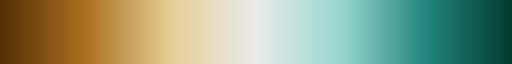

In [47]:
num_steps = 7
colors = []
center_color = (0.92, 0.92, 0.92)
base_cmap = matplotlib.cm.get_cmap('BrBG')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
biasCmapG = matplotlib.colors.LinearSegmentedColormap.from_list('bias_g', colors, N=256)
# display(base_cmap)
display(biasCmapG)

biasCmapG_vmin, biasCmapG_vmax = -1, 1
biasCmapG_norm = matplotlib.colors.Normalize(vmin=biasCmapG_vmin, vmax=biasCmapG_vmax)

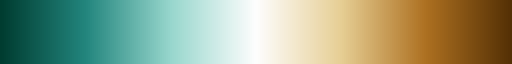

In [48]:
num_steps = 7
colors = []
center_color = (0.995, 0.995, 0.995)
base_cmap = matplotlib.cm.get_cmap('BrBG_r')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
biasCmapW = matplotlib.colors.LinearSegmentedColormap.from_list('bias_w', colors, N=256)
# display(base_cmap)
display(biasCmapW)

biasCmapW_vmin, biasCmapW_vmax = -1, 1
biasCmapW_norm = matplotlib.colors.Normalize(vmin=biasCmapW_vmin, vmax=biasCmapW_vmax)

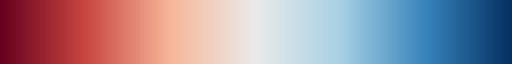

In [49]:
num_steps = 7
colors = []
center_color = (0.92, 0.92, 0.92)
base_cmap = matplotlib.cm.get_cmap('RdBu')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
residCmapG = matplotlib.colors.LinearSegmentedColormap.from_list('residual_g', colors, N=256)
display(residCmapG)

residCmapG_vmin, residCmapG_vmax = -1, 1
residCmapG_norm = matplotlib.colors.Normalize(vmin=residCmapG_vmin, vmax=residCmapG_vmax)

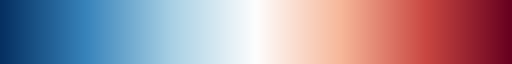

In [50]:
num_steps = 7
colors = []
center_color = (0.995, 0.995, 0.995)
base_cmap = matplotlib.cm.get_cmap('RdBu_r')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
residCmapW = matplotlib.colors.LinearSegmentedColormap.from_list('residual_w', colors, N=256)
# display(base_cmap)
display(residCmapW)

residCmapW_vmin, residCmapW_vmax = -1, 1
residCmapW_norm = matplotlib.colors.Normalize(vmin=residCmapW_vmin, vmax=residCmapW_vmax)

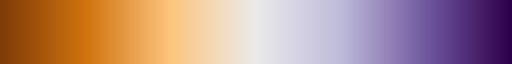

In [51]:
num_steps = 7
colors = []
center_color = (0.92, 0.92, 0.92)
base_cmap = matplotlib.cm.get_cmap('PuOr')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
fitnessCmapG = matplotlib.colors.LinearSegmentedColormap.from_list('fitnessual_w', colors, N=256)
# display(base_cmap)
display(fitnessCmapG)

fitnessCmapG_vmin, fitnessCmapG_vmax = -1, 1
fitnessCmapG_norm = matplotlib.colors.Normalize(vmin=fitnessCmapG_vmin, vmax=fitnessCmapG_vmax)

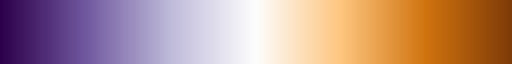

In [52]:
num_steps = 7
colors = []
center_color = (0.995, 0.995, 0.995)
base_cmap = matplotlib.cm.get_cmap('PuOr_r')
for step in range(num_steps):
    if(step == int(num_steps/2)):
        colors.append(center_color)
    else:
        colors.append(base_cmap(step/(num_steps-1)))
fitnessCmapW = matplotlib.colors.LinearSegmentedColormap.from_list('fitnessual_w', colors, N=256)
# display(base_cmap)
display(fitnessCmapW)

fitnessCmapW_vmin, fitnessCmapW_vmax = -1, 1
fitnessCmapW_norm = matplotlib.colors.Normalize(vmin=fitnessCmapW_vmin, vmax=fitnessCmapW_vmax)

In [53]:
palette = sns.color_palette('Set2', 8)
groups_colors = {'Diploid': palette[2], 'GPB2': palette[4], 'PDE2': palette[3], 'Other': palette[-2],  'IRA1': palette[-1]}
palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

------

## Figure 4

In [54]:
ECs_fig4 = [23, 21, 20, 18, 13, 3]

In [55]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if f"EC{ECnum}" in col] for ECnum in ECs_fig4])
viz_assays

array(['EC23-R1', 'EC23-R2', 'EC23-R3', 'EC21-R1', 'EC21-R2', 'EC21-R3',
       'EC20-R1', 'EC20-R2', 'EC20-R3', 'EC18-R1', 'EC18-R2', 'EC18-R3',
       'EC13-R1', 'EC13-R2', 'EC13-R3', 'EC3-R1', 'EC3-R2', 'EC3-R3'],
      dtype='<U7')

In [56]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if f"EC{ECnum}" in col] for ECnum in [23, 21, 20, 18, 13, 3]])
viz_samples

array(['EC23-R1-T0', 'EC23-R1-T1', 'EC23-R1-T2', 'EC23-R1-T3',
       'EC23-R1-T4', 'EC23-R2-T0', 'EC23-R2-T1', 'EC23-R2-T2',
       'EC23-R2-T3', 'EC23-R2-T4', 'EC23-R3-T0', 'EC23-R3-T1',
       'EC23-R3-T2', 'EC23-R3-T3', 'EC23-R3-T4', 'EC21-R1-T0',
       'EC21-R1-T1', 'EC21-R1-T2', 'EC21-R1-T3', 'EC21-R1-T4',
       'EC21-R2-T0', 'EC21-R2-T1', 'EC21-R2-T2', 'EC21-R2-T3',
       'EC21-R2-T4', 'EC21-R3-T0', 'EC21-R3-T1', 'EC21-R3-T2',
       'EC21-R3-T3', 'EC21-R3-T4', 'EC20-R1-T0', 'EC20-R1-T1',
       'EC20-R1-T2', 'EC20-R1-T3', 'EC20-R2-T0', 'EC20-R2-T1',
       'EC20-R2-T2', 'EC20-R2-T3', 'EC20-R3-T0', 'EC20-R3-T1',
       'EC20-R3-T2', 'EC20-R3-T3', 'EC18-R1-T0', 'EC18-R1-T1',
       'EC18-R1-T2', 'EC18-R1-T3', 'EC18-R2-T0', 'EC18-R2-T1',
       'EC18-R2-T2', 'EC18-R2-T3', 'EC18-R3-T0', 'EC18-R3-T1',
       'EC18-R3-T2', 'EC18-R3-T3', 'EC13-R1-T0', 'EC13-R1-T1',
       'EC13-R1-T2', 'EC13-R1-T3', 'EC13-R1-T4', 'EC13-R2-T0',
       'EC13-R2-T1', 'EC13-R2-T2', 'EC13-R2-T3', 'EC13-

In [57]:
variants_GCsorted = viz_resids_final.loc[viz_variantsInfo.sort_values(by='barcode_GCratio').index.values, [a for a in viz_samples if 'TX' not in a and 'T0' not in a]].dropna().index.values
print(variants_GCsorted, len(variants_GCsorted))

[379 335 512 409  44 132 474 462  91 287 504 113 246  80 524 478  98 482
  66 306 387 170  11 488  56 408 491 283 342  87  21  82 406 503 446 159
 160 161 529 251 213 423  89 364 369 359 391 307 333 209 215 236 165 267
 269 157 156 274 149 288 298 143 136 308 312 131 110  69 265 508  52 505
 510  12 454 487 485 525  48  47 450 500 526 528 475  68 473  60 329 324
 496 148 322  32  38 300  33 284 302  29 301 434 502 208 194 189 187 220
 227 229 182 232   4 238 175 174 242   7 167 517 268 330 281 331 317 470
 100 459 388 452  57 451 398  84 405 443 416 420 440 428 433 367 361 384
 469 355 344  45 354 114 467 394 348 240 237 233 449 445 230 318 414 341
 422 336 527 211 210 327 431 206 471 350 250 357 293 291 463 489 370 372
 497 377 280 498 501 201 381 383 332 386 305 514 468 261 390 256 518 481
 199   0 178  20 129  78 133 135 138 139  75  37 141 142  43 144  74  73
 147  54  55 164  58  61  83 127 155  97 117   9  94 120 101 106  99 186
  90 108 438 378 295 294 425  72 437 289 151 152 15

In [58]:
viz_variants_GCsorted = [v for v in variants_GCsorted if v in viz_variants]
print(viz_variants_GCsorted, len(viz_variants_GCsorted))

[409, 44, 132, 462, 91, 287, 246, 98, 66, 306, 56, 491, 283, 342, 87, 21, 82, 406, 503, 446, 213, 89, 364, 391, 307, 209, 215, 236, 267, 156, 274, 149, 136, 308, 69, 265, 508, 52, 505, 12, 454, 487, 485, 48, 47, 68, 473, 60, 329, 496, 148, 38, 300, 33, 284, 302, 434, 208, 194, 189, 187, 220, 229, 232, 4, 238, 175, 167, 330, 317, 470, 100, 388, 57, 398, 405, 443, 420, 440, 433, 367, 361, 384, 355, 354, 240, 237, 449, 445, 230, 318, 414, 341, 422, 336, 327, 431, 206, 350, 250, 291, 372, 497, 377, 280, 381, 383, 332, 305, 261, 256, 481, 199, 0, 20, 129, 78, 133, 138, 139, 75, 37, 142, 43, 144, 74, 73, 147, 54, 55, 164, 61, 127, 97, 117, 9, 120, 101, 106, 99, 186, 90, 108, 295, 294, 425, 72, 152, 150, 347, 376, 105, 360, 429, 393, 88, 125, 92, 121, 314, 345, 134, 311, 419, 309, 339, 303, 140, 119, 362, 180, 515, 28, 492, 25, 177, 179, 522, 235, 16, 14, 226, 222, 516, 479, 195, 42, 63, 271, 2, 158, 162, 458, 196, 259, 203, 3, 46, 5, 1, 375, 520, 198, 96, 102, 371, 380, 385, 441, 435, 70, 43

In [59]:
viz_fEpsilons = {group: viz_fitnesses_orig[group] - viz_fitnesses_orig[group].mean(axis=0) for group in viz_fitnesses_orig.keys()}
viz_fEpsilons.keys()

dict_keys(['Diploid', 'PDE2', 'GPB2', 'all'])

In [60]:
viz_fDeltas = {group: viz_fitnesses_final[group] - viz_fitnesses_orig[group] for group in viz_fitnesses_orig.keys()}
viz_fDeltas.keys()

dict_keys(['Diploid', 'PDE2', 'GPB2', 'all'])

In [61]:
assay_relabels = {
'EC23': 'EC1',
'EC21': 'EC2',
'EC20': 'EC3',
'EC18': 'EC4',
'EC13': 'EC5',
'EC3': 'EC6',
'Baffled': 'Baffled',
'1.4%Gluc': '1.4% Gluc',
'1.6%Gluc': '1.6% Gluc',
'1.8%Gluc': '1.8% Gluc',
'0.5%Raf': '0.5% Raf',
'1.5%Suc1%Raf': '1.5% Suc, 1% Raf',
'0.2MKCl': '0.2M KCl',
'0.5MKCl': '0.5M KCl',
'M3': 'ECBB',
}

/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC23-R1-T0', 'EC23-R1-T1', 'EC23-R1-T2', 'EC23-R1-T3', 'EC23-R1-T4', 'EC23-R2-T0', 'EC23-R2-T1', 'EC23-R2-T2', 'EC23-R2-T3', 'EC23-R2-T4', 'EC23-R3-T0', 'EC23-R3-T1', 'EC23-R3-T2', 'EC23-R3-T3', 'EC23-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC21-R1-T0', 'EC21-R1-T1', 'EC21-R1-T2', 'EC21-R1-T3', 'EC21-R1-T4', 'EC21-R2-T0', 'EC21-R2-T1', 'EC21-R2-T2', 'EC21-R2-T3', 'EC21-R2-T4', 'EC21-R3-T0', 'EC21-R3-T1', 'EC21-R3-T2', 'EC21-R3-T3', 'EC21-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC20-R1-T0', 'EC20-R1-T1', 'EC20-R1-T2', 'EC20-R1-T3', 'EC20-R2-T0', 'EC20-R2-T1', 'EC20-R2-T2', 'EC20-R2-T3', 'EC20-R3-T0', 'EC20-R3-T1', 'EC20-R3-T2', 'EC20-R3-T3']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC18-R1-T0', 'EC18-R1-T1', 'EC18-R1-T2', 'EC18-R1-T3', 'EC18-R2-T0', 'EC18-R2-T1', 'EC18-R2-T2', 'EC18-R2-T3', 'EC18-R3-T0', 'EC18-R3-T1', 'EC18-R3-T2', 'EC18-R3-T3']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC13-R1-T0', 'EC13-R1-T1', 'EC13-R1-T2', 'EC13-R1-T3', 'EC13-R1-T4', 'EC13-R2-T0', 'EC13-R2-T1', 'EC13-R2-T2', 'EC13-R2-T3', 'EC13-R2-T4', 'EC13-R3-T0', 'EC13-R3-T1', 'EC13-R3-T2', 'EC13-R3-T3', 'EC13-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC3-R1-T0', 'EC3-R1-T1', 'EC3-R1-T2', 'EC3-R1-T3', 'EC3-R1-T4', 'EC3-R2-T0', 'EC3-R2-T1', 'EC3-R2-T2', 'EC3-R2-T3', 'EC3-R2-T4', 'EC3-R3-T0', 'EC3-R3-T1', 'EC3-R3-T2', 'EC3-R3-T3', 'EC3-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


['EC23-R1', 'EC23-R2', 'EC23-R3']
['EC21-R1', 'EC21-R2', 'EC21-R3']
['EC20-R1', 'EC20-R2', 'EC20-R3']
['EC18-R1', 'EC18-R2', 'EC18-R3']
['EC13-R1', 'EC13-R2', 'EC13-R3']
['EC3-R1', 'EC3-R2', 'EC3-R3']
['EC23-R1', 'EC23-R2', 'EC23-R3']
['EC21-R1', 'EC21-R2', 'EC21-R3']
['EC20-R1', 'EC20-R2', 'EC20-R3']
['EC18-R1', 'EC18-R2', 'EC18-R3']
['EC13-R1', 'EC13-R2', 'EC13-R3']
['EC3-R1', 'EC3-R2', 'EC3-R3']


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


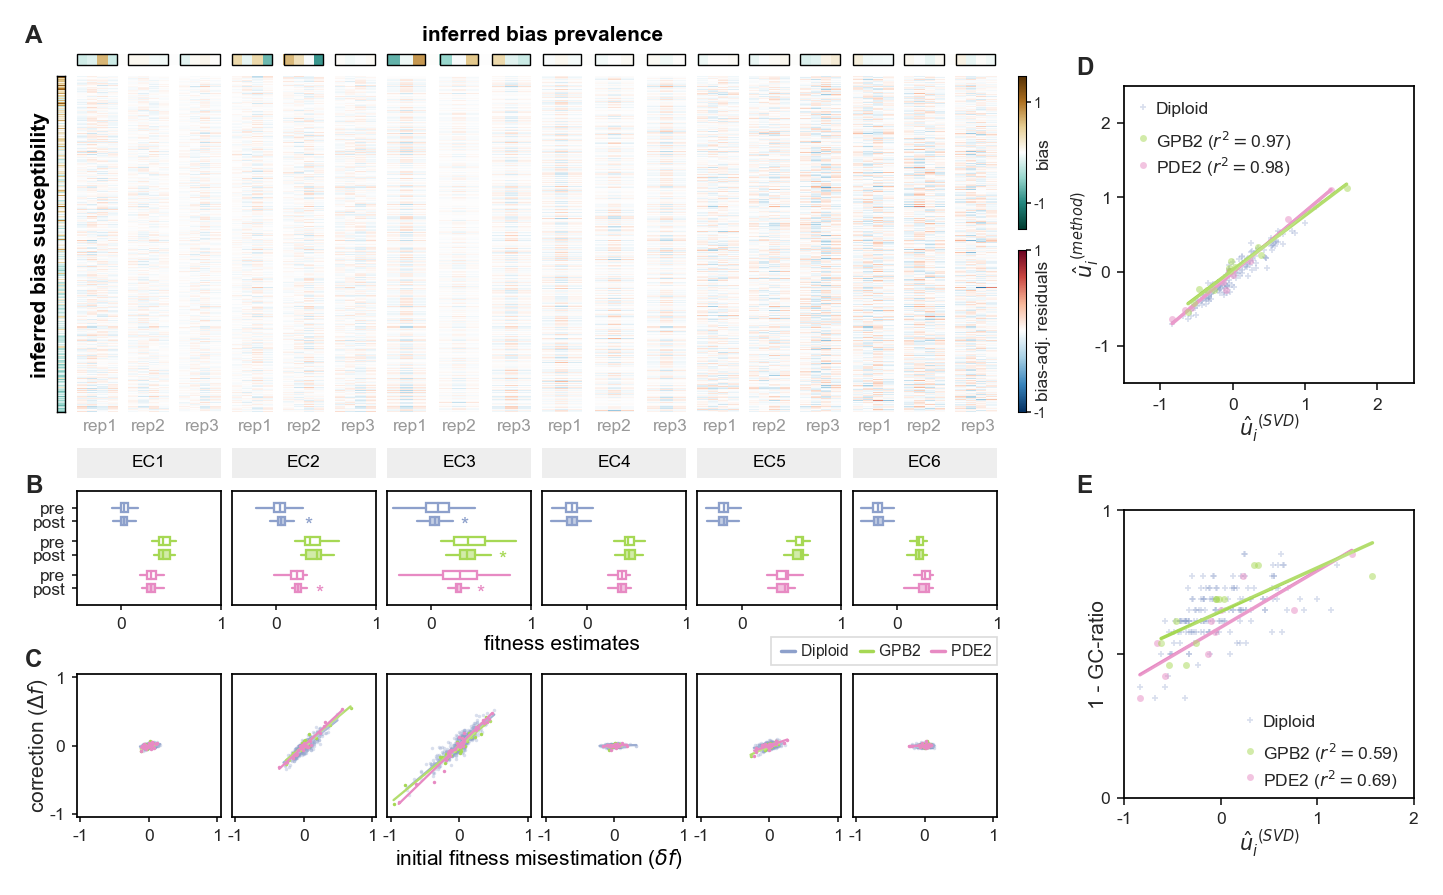

In [62]:
figsize = (7, 4.0) 
fig4 = plt.figure(constrained_layout=False, figsize=figsize, dpi=250) # 250

gridsize = (int(figsize[0]*10*2), int(figsize[1]*10*2))
gs = fig4.add_gridspec(gridsize[1], gridsize[0])

gridHeight_v       = 2
gridHeight_A       = int(gridsize[1]*0.45)-1
gridHeight_B       = int(gridsize[1]*0.15)
gridHeight_C       = int(gridsize[1]*0.2)-1
gridHeight_D       = int(gridsize[1]*0.4)-1
gridHeight_E       = int(gridsize[1]*0.4)-1

gridHeight_vAspace = 1
gridHeight_ABspace = int(gridsize[1]*0.115)+1
gridHeight_BCspace = int(gridsize[1]*0.085)+1
gridHeight_DEspace = int(1)

gridWidth_uAspace  = 1
gridWidth_ECspace  = 1

gridWidth_u        = 1
gridWidth_ABC      = int(gridsize[0]*0.70)
gridWidth_DE       = int(gridsize[0]*0.22)
gridWidth_EC       = int(gridWidth_ABC/len(ECs_fig4)) - gridWidth_ECspace
gridWidth_cbar     = 1

ax4A_u    = fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace):(gridHeight_v + gridHeight_vAspace + gridHeight_A), :gridWidth_u])
ax4Av_ECs = []
ax4A_ECs  = []
ax4B_ECs  = []
ax4C_ECs  = []
for i in range(len(ECs_fig4)):
    gridx_start = (gridWidth_u + gridWidth_uAspace + i*gridWidth_EC + i*gridWidth_ECspace)
    gridx_end   = gridx_start + gridWidth_EC
    ax4Av_ECs.append( fig4.add_subplot(gs[0:gridHeight_v, gridx_start:gridx_end]) )
    ax4A_ECs.append( fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace):(gridHeight_v + gridHeight_vAspace + gridHeight_A), gridx_start:gridx_end]) )
    ax4B_ECs.append( fig4.add_subplot(gs[(-gridHeight_C - gridHeight_BCspace - gridHeight_B):(-gridHeight_C - gridHeight_BCspace), gridx_start:gridx_end], sharex=ax4B_ECs[0] if i!=0 else None) )
    ax4C_ECs.append( fig4.add_subplot(gs[(-gridHeight_C):, gridx_start:gridx_end], sharex=ax4C_ECs[0] if i!=0 else None) )
ax4A_cbarBias = fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace):(gridHeight_v + gridHeight_vAspace + int(gridHeight_A/2)-1), (gridx_end + gridWidth_ECspace)+1:(gridx_end + gridWidth_ECspace + gridWidth_cbar)+1])
ax4A_cbarResids = fig4.add_subplot(gs[(gridHeight_v + gridHeight_vAspace + int(gridHeight_A/2)+1):(gridHeight_v + gridHeight_vAspace + gridHeight_A), (gridx_end + gridWidth_ECspace)+1:(gridx_end + gridWidth_ECspace + gridWidth_cbar)+1])

ax4D = fig4.add_subplot(gs[(1 + gridHeight_v + gridHeight_vAspace):(1 + gridHeight_v + gridHeight_vAspace + gridHeight_D), -gridWidth_DE:])
ax4E = fig4.add_subplot(gs[-(1 + gridHeight_E):-(1+1), -gridWidth_DE:])

for ax in ax4A_ECs + ax4Av_ECs + [ax4A_u, ax4D, ax4E]: 
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

sns.heatmap(ax=ax4A_u, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax4A_u.set_xticks([])
ax4A_u.set_yticks([])
# ax4A_u.set_ylabel("bias susceptibility", labelpad=0, fontsize=6)
ax4A_u.text(-2.1, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax4A_u.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")

for c, ECnum in enumerate(ECs_fig4):
    
    samples_fig4A_EC = [col for col in viz_resids_final.columns if f"EC{ECnum}" in col]
    print(samples_fig4A_EC)
    # print("aaa")
    #----------
    hm_bias = sns.heatmap(ax=ax4Av_ECs[c], data=viz_biasprev_final[samples_fig4A_EC[1:]], cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                          cbar=(c==len(ECs_fig4)-1), cbar_ax=(ax4A_cbarBias if c==len(ECs_fig4)-1 else None), cbar_kws=({'label':"bias", 'drawedges':False, 'ticks':[-1, 1]} if c==len(ECs_fig4)-1 else None))
    ax4Av_ECs[c].set_xticks([])
    ax4Av_ECs[c].set_yticks([])
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(0, 0), width=15, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(0*len(samples_fig4A_EC)/3+0.02, 0.405), width=(len(samples_fig4A_EC)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(1*len(samples_fig4A_EC)/3+0.02, 0.405), width=(len(samples_fig4A_EC)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax4Av_ECs[c].add_patch(mpatches.Rectangle(xy=(2*len(samples_fig4A_EC)/3+0.02, 0.405), width=(len(samples_fig4A_EC)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    # for spine in ax4Av_ECs[c].spines.values():
    #     spine.set(visible=True, lw=.3, edgecolor="black")
    # print("bbb")
    #----------
    hm_resids = sns.heatmap(ax=ax4A_ECs[c], data=viz_resids_final.loc[viz_variants_GCsorted, samples_fig4A_EC[1:]], cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                            cbar=(c==len(ECs_fig4)-1), cbar_ax=(ax4A_cbarResids if c==len(ECs_fig4)-1 else None), cbar_kws=({'label':"residuals", 'drawedges':False, 'ticks':[-1, 1]} if c==len(ECs_fig4)-1 else None))
    ax4A_ECs[c].set_xticks([])
    ax4A_ECs[c].set_yticks([])
    # print("ccc")
    #----------
    ax4A_ECs[c].text(len(samples_fig4A_EC[:-1])/2, len(viz_variants_GCsorted)+45, assay_relabels[f"EC{ECnum}"], c='k', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax4A_ECs[c].text(2.25 if len(samples_fig4A_EC[:-1]) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax4A_ECs[c].text(len(samples_fig4A_EC[:-1])/2, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax4A_ECs[c].text(12.25 if len(samples_fig4A_EC[:-1]) == 14 else 9.75, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    # ax4A_ECs[c].plot([0, len(samples_fig4A_EC[:-1])], [len(viz_variants_GCsorted)+32, len(viz_variants_GCsorted)+32], c='k', lw=0.5, clip_on=False)
    ax4A_ECs[c].add_patch(mpatches.Rectangle(xy=(0, len(viz_variants_GCsorted)+38), width=len(samples_fig4A_EC[:-1]), height=32, fc='#eee', ec='k', lw=0.0, clip_on=False, zorder=1))
    # print("ddd")
    
    # break
    
ax4Av_ECs[3].text(0, -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)

# ax4A_cbarBias.yaxis.label.set_size(4)
# ax4A_cbarBias.yaxis.get_label().set(fontsize=4, position=(0, 0))

ax4A_cbarBias.set_yticks([-1, 1])
ax4A_cbarBias.set_yticklabels([-1, 1], fontsize=4)
ax4A_cbarBias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax4A_cbarBias.tick_params(width=0.5, length=1.33, pad=1)
ax4A_cbarResids.set_yticks([-1, 1])
ax4A_cbarResids.set_yticklabels([-1, 1], fontsize=4)
ax4A_cbarResids.set_ylabel("bias-adj. residuals", fontsize=5, labelpad=-3)
ax4A_cbarResids.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax4A_cbarBias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax4A_cbarResids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
    
ax4A_u.text(-4, -55, "A", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
ax4A_u.text(-4, 425, "B", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
ax4A_u.text(-4, 610, "C", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

vizGroups_fig4B = ['Diploid', 'GPB2', 'PDE2']

for c, ECnum in enumerate(ECs_fig4):
    viz_assays_EC = [col for col in viz_fitnesses_final['all'].columns if f"EC{ECnum}" in col]
    print(viz_assays_EC)
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g_a = np.array([])
        viz_fitnesses_final_g_a = np.array([])
        for a, assay in enumerate(viz_assays_EC):
            viz_fitnesses_orig_g_a  = np.hstack([viz_fitnesses_orig_g_a, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g_a = np.hstack([viz_fitnesses_final_g_a, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g_a, viz_fitnesses_final_g_a).pvalue
        if(pvalue < 0.05):
            ax4B_ECs[c].text(np.percentile(viz_fitnesses_final_g_a, 99)+(0.025 if ECnum == 20 and group == 'PDE2' else 0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g_a)
        boxplot_fitnesses.append(viz_fitnesses_final_g_a)
    
    bplot = ax4B_ECs[c].boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax4B_ECs[c].set_xticks([0, 1])
    ax4B_ECs[c].set_xticklabels([0, 1], fontsize=5)
    ax4B_ECs[c].set_xlabel('')
    ax4B_ECs[c].set_yticks(box_positions if c==0 else []) # if c!=0 else [1, 2, 3])
    ax4B_ECs[c].set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if c==0 else [], fontsize=5) # if c!=0 else ['Dip.', 'GPB2', 'PDE2'], fontsize=4)    
    ax4B_ECs[c].set_ylabel('')    
    ax4B_ECs[c].tick_params(width=0.5, length=1.33, pad=2)
    
    ax4B_ECs[c].set_facecolor('#fff')
    
    for spine in ax4B_ECs[c].spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    # break
    
ax4B_ECs[3].text(-0.25, -0.875, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

for c, ECnum in enumerate(ECs_fig4):
    viz_assays_EC = [col for col in viz_fitnesses_final['all'].columns if f"EC{ECnum}" in col]
    print(viz_assays_EC)
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in viz_assays_EC])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in viz_assays_EC])
    
        sns.regplot(ax=ax4C_ECs[c], x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    ax4C_ECs[c].set_xlabel('')
    ax4C_ECs[c].set_ylabel('')    
    
    ax4C_ECs[c].set_xlim((-1.05, 1.05))
    ax4C_ECs[c].set_xticks([-1, 0, 1])
    ax4C_ECs[c].set_xticklabels([-1, 0, 1], fontsize=5)
    ax4C_ECs[c].set_ylim((-1.05, 1.05))
    ax4C_ECs[c].set_yticks([-1, 0, 1] if c==0 else [])
    ax4C_ECs[c].set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax4C_ECs[c].tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax4C_ECs[c].spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
            
    if(c == len(ECs_fig4)-1):
        ax4C_ECs[c].text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax4C_ECs[c].plot([0.10, 0.30], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax4C_ECs[c].plot([-0.95, -0.75], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax4C_ECs[c].plot([-2.09, -1.89], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
    

ax4C_ECs[0].set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        

ax4C_ECs[3].text(-1.1, -1.65, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
    
    viz_fEpsilons_g = viz_fEpsilons[group]

    U_g, s_g, VT_g = np.linalg.svd(viz_fEpsilons_g.dropna(axis=1).values[:, :])
    
    u_svd_g    = (s_g[0])*U_g[:, 0]
    u_method_g = viz_biassusc_final[viz_fEpsilons_g.index.tolist()]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((u_svd_g), (u_method_g))
    # print("u_svd X u_method_g:", group, "m =", slope, "intc =", intercept, "r^2 =", r_value**2, "p =", p_value, "stderr =", std_err)
    
    if('Diploid' in group):
        ax4D.plot((-1 if slope<0 else 1)*(u_svd_g), (u_method_g), marker='+', ms=2, mew=0.5, ls='none', alpha=0.33, c=groups_colors[group], label=f"{group}", zorder=-100)
    elif('IRA' not in group):  
        sns.regplot(ax=ax4D, x=(-1 if slope<0 else 1)*(u_svd_g), y=(u_method_g), ci=0, label=f"{group} ($r^2 = ${r_value**2:.2f})",
                   color=groups_colors[group], marker=('+' if 'Diploid' in group else 'o'), 
                    scatter_kws={'alpha': 0.5, 's': 4, 'lw': 0, 'zorder': -g}, line_kws={'lw': 1.0, 'zorder': -g})
    
    gcratio = viz_variantsInfo.loc[viz_fEpsilons_g.index.tolist(), 'barcode_GCratio'].values
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(1-(gcratio), (u_method_g))
    # print("gcratio X u_method_g:", group, "m =", slope, "intc =", intercept, "r^2 =", r_value**2, "p =", p_value, "stderr =", std_err)

    if('Diploid' in group):
        ax4E.plot((1 if group != 'PDE2' else -1)*(u_svd_g), 1-(gcratio), marker='+', ms=2, mew=0.5, ls='none', alpha=0.33, c=groups_colors[group], label=f"{group}", zorder=-100)
    elif('IRA' not in group):  
        sns.regplot(ax=ax4E, y=1-(gcratio), x=(-1 if group != 'PDE2' else 1)*(u_svd_g), ci=0, label=f"{group} ($r^2 = ${r_value**2:.2f})", 
                   color=groups_colors[group], marker=('+' if 'Diploid' in group else 'o'), 
                    scatter_kws={'alpha': 0.5, 's': 4, 'lw': 0, 'zorder': -g}, line_kws={'lw': 1.0, 'zorder': -g})

ax4E.set_xlabel("$\hat{u}_i^{~(SVD)}$", labelpad=0, fontsize=6) # 
ax4E.set_xticks([-1, 0, 1, 2])
ax4E.set_xticklabels([-1, 0, 1, 2], fontsize=5)
ax4E.set_ylabel("1 - GC-ratio", labelpad=-2, fontsize=6)
ax4E.set_ylim((0, 1))
ax4E.set_yticks([0, 0.5, 1], fontsize=5)
ax4E.set_yticklabels([0, '', 1], fontsize=5)
legend4BC1 = ax4E.legend(scatterpoints=1, scatteryoffsets=[0], frameon=False, loc='lower right',  handletextpad=-0.25, labelspacing=0.2, fontsize=5)
for labeltext in legend4BC1.get_texts(): 
    if(labeltext.get_text() != 'Diploid'):
        labeltext.set_va('center_baseline')

ax4E.tick_params(width=0.5, length=2, pad=2)
for spine in ax4E.spines.values():
    spine.set_edgecolor('#000')
    spine.set_linewidth(0.5)
        
ax4D.set_xlabel("$\hat{u}_i^{~(SVD)}$", labelpad=0, fontsize=6) #^{~(SVD)}
ax4D.set_ylabel("$\hat{u}_{i}^{~(method)}$", labelpad=-2, fontsize=6) # ^{~(method)}
ax4D.set_xlim((-1.5, 2.5))
ax4D.set_ylim((-1.5, 2.5))
ax4D.set_xticks([-1, 0, 1, 2])
ax4D.set_yticks([-1, 0, 1, 2])
ax4D.set_xticklabels([-1, 0, 1, 2], fontsize=5)
ax4D.set_yticklabels([-1, 0, 1, 2], fontsize=5)
ax4D.legend(frameon=False, loc='upper left', fontsize=5)
legend4BC0 = ax4D.legend(scatterpoints=1,scatteryoffsets=[0], frameon=False, loc='upper left', bbox_to_anchor=(-0.05, 1.0), handletextpad=-0.25, labelspacing=0.2, fontsize=5)
for labeltext in legend4BC0.get_texts(): 
    if(labeltext.get_text() != 'Diploid'):
        labeltext.set_va('center_baseline')

ax4D.tick_params(width=0.5, length=2, pad=2)
for spine in ax4D.spines.values():
    spine.set_edgecolor('#000')
    spine.set_linewidth(0.5)
    
ax4E.text(-1.5, 2.575, "D", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)
ax4E.text(-1.5, 1.125, "E", verticalalignment='top', horizontalalignment='left', fontsize=7, weight='bold', rotation=0)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
# ax4A_ECs[0].add_patch(mpatches.Rectangle(xy=(-10, 0), width=1, height=10, fc='#000', ec='w', lw=0.0, clip_on=False, zorder=-999))
        
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.show()


In [63]:
fig4.savefig(f"./figures/fig4_{date}.png", dpi=300)

------

## Supplementary Figs

In [64]:
assaysets_figSI = ['EC23', 'EC21', 'EC20', 'EC18', 'EC13', 'EC3']
assaysets_figSI

['EC23', 'EC21', 'EC20', 'EC18', 'EC13', 'EC3']

In [65]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if f"EC{ECnum}" in col] for ECnum in ECs_fig4])
viz_assays

array(['EC23-R1', 'EC23-R2', 'EC23-R3', 'EC21-R1', 'EC21-R2', 'EC21-R3',
       'EC20-R1', 'EC20-R2', 'EC20-R3', 'EC18-R1', 'EC18-R2', 'EC18-R3',
       'EC13-R1', 'EC13-R2', 'EC13-R3', 'EC3-R1', 'EC3-R2', 'EC3-R3'],
      dtype='<U7')

In [66]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if f"EC{ECnum}" in col] for ECnum in [23, 21, 20, 18, 13, 3]])
viz_samples
print(len(viz_samples))

84


EC23
2:12
['EC23-R1', 'EC23-R2', 'EC23-R3']
['EC23-R1-T1', 'EC23-R1-T2', 'EC23-R1-T3', 'EC23-R1-T4', 'EC23-R2-T0', 'EC23-R2-T1', 'EC23-R2-T2', 'EC23-R2-T3', 'EC23-R2-T4', 'EC23-R3-T0', 'EC23-R3-T1', 'EC23-R3-T2', 'EC23-R3-T3', 'EC23-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


EC21
13:23
['EC21-R1', 'EC21-R2', 'EC21-R3']
['EC21-R1-T1', 'EC21-R1-T2', 'EC21-R1-T3', 'EC21-R1-T4', 'EC21-R2-T0', 'EC21-R2-T1', 'EC21-R2-T2', 'EC21-R2-T3', 'EC21-R2-T4', 'EC21-R3-T0', 'EC21-R3-T1', 'EC21-R3-T2', 'EC21-R3-T3', 'EC21-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


EC20
24:34
['EC20-R1', 'EC20-R2', 'EC20-R3']
['EC20-R1-T1', 'EC20-R1-T2', 'EC20-R1-T3', 'EC20-R2-T0', 'EC20-R2-T1', 'EC20-R2-T2', 'EC20-R2-T3', 'EC20-R3-T0', 'EC20-R3-T1', 'EC20-R3-T2', 'EC20-R3-T3']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


EC18
35:45
['EC18-R1', 'EC18-R2', 'EC18-R3']
['EC18-R1-T1', 'EC18-R1-T2', 'EC18-R1-T3', 'EC18-R2-T0', 'EC18-R2-T1', 'EC18-R2-T2', 'EC18-R2-T3', 'EC18-R3-T0', 'EC18-R3-T1', 'EC18-R3-T2', 'EC18-R3-T3']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


EC13
46:56
['EC13-R1', 'EC13-R2', 'EC13-R3']
['EC13-R1-T1', 'EC13-R1-T2', 'EC13-R1-T3', 'EC13-R1-T4', 'EC13-R2-T0', 'EC13-R2-T1', 'EC13-R2-T2', 'EC13-R2-T3', 'EC13-R2-T4', 'EC13-R3-T0', 'EC13-R3-T1', 'EC13-R3-T2', 'EC13-R3-T3', 'EC13-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


EC3
57:67
['EC3-R1', 'EC3-R2', 'EC3-R3']
['EC3-R1-T1', 'EC3-R1-T2', 'EC3-R1-T3', 'EC3-R1-T4', 'EC3-R2-T0', 'EC3-R2-T1', 'EC3-R2-T2', 'EC3-R2-T3', 'EC3-R2-T4', 'EC3-R3-T0', 'EC3-R3-T1', 'EC3-R3-T2', 'EC3-R3-T3', 'EC3-R3-T4']


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes size

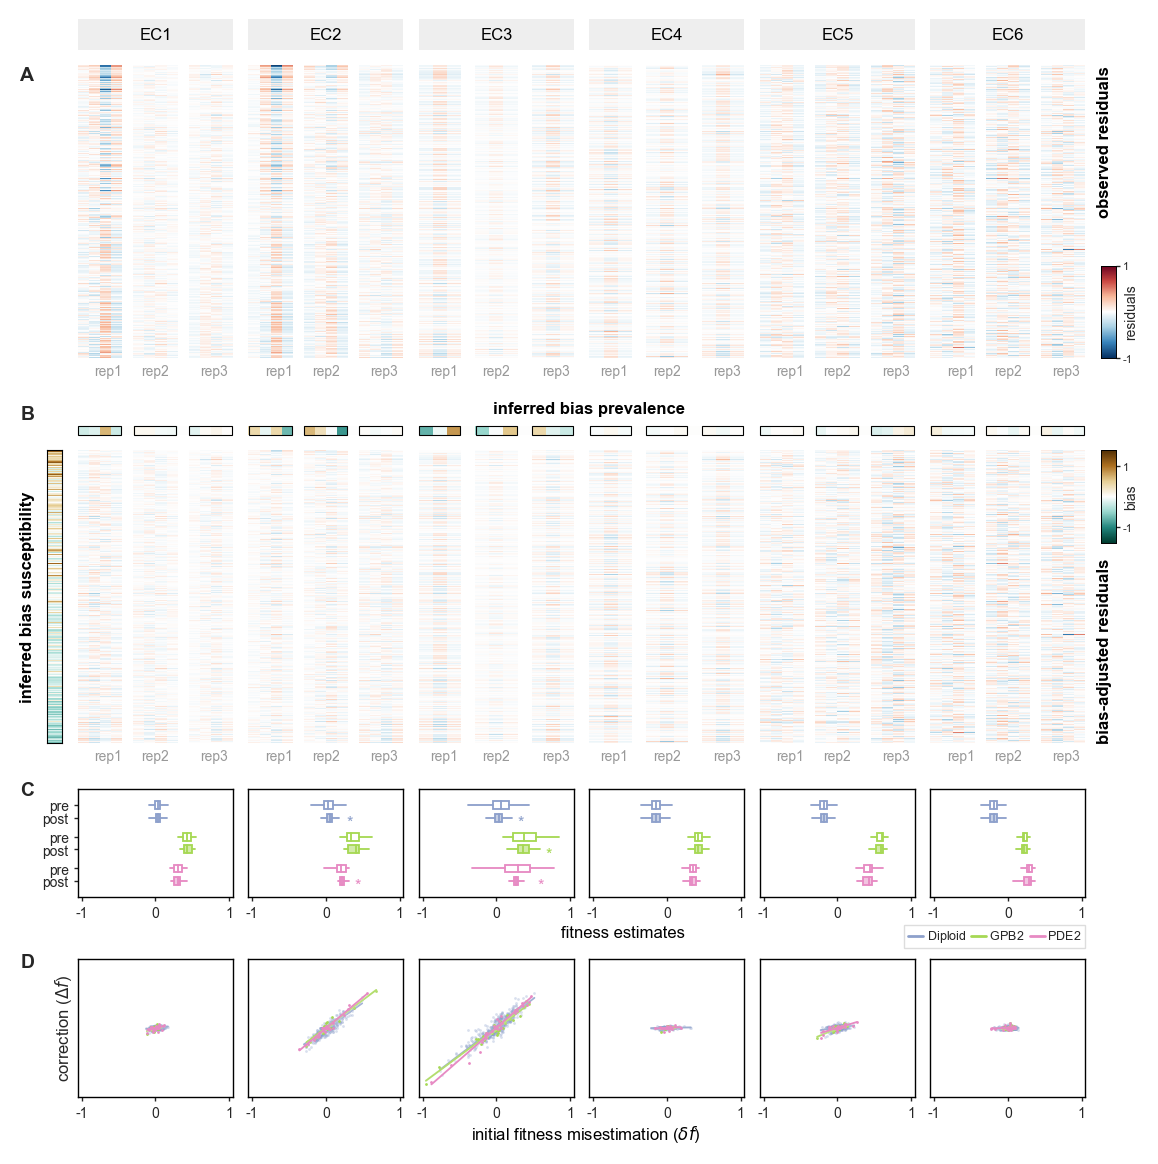

In [67]:
figsize = (7.0, 7.0) 
figSI = plt.figure(constrained_layout=True, figsize=figsize, dpi=200) # 250

gridsize = (int(figsize[0]*10), int(figsize[1]*10))
gs = figSI.add_gridspec(gridsize[1], gridsize[0], wspace=0.0, hspace=0.0, width_ratios=[1]*gridsize[1], height_ratios=[1]*gridsize[0])


grid = {'assaysetlabel': {'y0': 0,  'yf': 2},
        'residsorig':    {'y0': 3,  'yf': 22},
        'biasprev':      {'y0': 26, 'yf': 27},
        'biassusc':      {'y0': 28, 'yf': 47},
        'residsfinal':   {'y0': 28, 'yf': 47},
        'fitnessdistns': {'y0': 50, 'yf': 57},
        'fitnessdeltas': {'y0': 61, 'yf': gridsize[1]}}

# ax_wut = figSI.add_subplot(gs[0:1, 0:1])
# ax_wut2 = figSI.add_subplot(gs[1:2, 1:2])

ax_biassusc    = figSI.add_subplot(gs[grid['biassusc']['y0']:grid['biassusc']['yf'], 0:1])
 

    

# ax_cbar_biasorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:13, -1:])
ax_cbar_resids  = figSI.add_subplot(gs[16:grid['residsorig']['yf'], -2:-1])
ax_cbar_bias   = figSI.add_subplot(gs[grid['residsfinal']['y0']:34, -2:-1])
# ax_cbar_residsfinal = figSI.add_subplot(gs[39:grid['residsfinal']['yf'], -1:])


for a, assayset in enumerate(assaysets_figSI):
    print(assayset)
    
    # if(a != 0 and a != 5):
    #     continue
    
    col_w = 10
    col_x = 2 + (a*col_w)+(a*1)
    
    print(f"{col_x}:{col_x+col_w}")
    
    ax_assaysetlabel = figSI.add_subplot(gs[grid['assaysetlabel']['y0']:grid['assaysetlabel']['yf'], col_x:col_x+col_w])
    ax_residsorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:grid['residsorig']['yf'], col_x:col_x+col_w])
    ax_biasprev      = figSI.add_subplot(gs[grid['biasprev']['y0']:grid['biasprev']['yf'], col_x:col_x+col_w])
    ax_residsfinal   = figSI.add_subplot(gs[grid['residsfinal']['y0']:grid['residsfinal']['yf'], col_x:col_x+col_w])
    ax_fitnessdistns = figSI.add_subplot(gs[grid['fitnessdistns']['y0']:grid['fitnessdistns']['yf'], col_x:col_x+col_w])
    ax_fitnessdeltas = figSI.add_subplot(gs[grid['fitnessdeltas']['y0']:grid['fitnessdeltas']['yf']:, col_x:col_x+col_w])
    
    assays_figSI_aset  = [col for col in viz_fitnesses_final['all'].columns if assayset in col]
    samples_figSI_aset = [col for col in viz_resids_final.columns if assayset in col][1:]
    print(assays_figSI_aset)
    print(samples_figSI_aset)
    
    #--------------------
    
    ax_assaysetlabel.text(0.5, 0.5, assay_relabels[f"{assayset}"], c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)    
    ax_assaysetlabel.set_facecolor('#eee')
    ax_assaysetlabel.set_xticks([])
    ax_assaysetlabel.set_yticks([])
    for spine in ax_assaysetlabel.spines.values():
        spine.set(visible=True, lw=0, edgecolor="white")
    
    #--------------------
    
    hm_residsorig = sns.heatmap(ax=ax_residsorig, data=viz_resids_orig.loc[viz_variants_GCsorted, samples_figSI_aset], cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=(a==0), cbar_ax=ax_cbar_resids, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
    
    ax_residsorig.set_xticks([])
    ax_residsorig.set_yticks([])
    
    ax_residsorig.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsorig.text(len(samples_figSI_aset)/2, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsorig.text(12.25 if len(samples_figSI_aset) == 14 else 9.75, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsorig.text(15, 0, "observed residuals", c='k', verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)    
    
    #--------------------
    
    hm_biasprev = sns.heatmap(ax=ax_biasprev, data=viz_biasprev_final[samples_figSI_aset], cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                              cbar=(a==0), cbar_ax=ax_cbar_bias, cbar_kws={'label':"bias", 'drawedges':False, 'ticks':[-1, 1]})
    
    ax_biasprev.set_xticks([])
    ax_biasprev.set_yticks([])
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0, 0), width=15, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0*(len(samples_figSI_aset)+1)/3+0.02, 0.405), width=((len(samples_figSI_aset)+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(1*(len(samples_figSI_aset)+1)/3+0.02, 0.405), width=((len(samples_figSI_aset)+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(2*(len(samples_figSI_aset)+1)/3+0.02, 0.405), width=((len(samples_figSI_aset)+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    
    if(a == 3):
        ax_biasprev.text(0, -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    hm_residsfinal = sns.heatmap(ax=ax_residsfinal, data=viz_resids_final.loc[viz_variants_GCsorted, samples_figSI_aset], cmap=residCmapW, center=0, vmin=-1, vmax=1, cbar=False)
    
    ax_residsfinal.set_xticks([])
    ax_residsfinal.set_yticks([])
    
    ax_residsfinal.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsfinal.text(len(samples_figSI_aset)/2, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    ax_residsfinal.text(12.25 if len(samples_figSI_aset) == 14 else 9.75, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsfinal.text(15, len(viz_biassusc_final[viz_variants_GCsorted]), "bias-adjusted residuals", c='k', verticalalignment='bottom', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g = np.array([])
        viz_fitnesses_final_g = np.array([])
        for ai, assay in enumerate(assays_figSI_aset):
            viz_fitnesses_orig_g  = np.hstack([viz_fitnesses_orig_g, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g = np.hstack([viz_fitnesses_final_g, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g, viz_fitnesses_final_g).pvalue
        if(pvalue < 0.05):
            ax_fitnessdistns.text(np.percentile(viz_fitnesses_final_g, 99)+(0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g)
        boxplot_fitnesses.append(viz_fitnesses_final_g)
    
    bplot = ax_fitnessdistns.boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax_fitnessdistns.set_xlim((-1.05, 1.05))
    ax_fitnessdistns.set_xticks([-1, 0, 1])
    ax_fitnessdistns.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdistns.set_xlabel('')
    ax_fitnessdistns.set_yticks(box_positions if a==0 else []) # if c!=0 else [1, 2, 3])
    ax_fitnessdistns.set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if a==0 else [], fontsize=5) 
    ax_fitnessdistns.set_ylabel('')    
    ax_fitnessdistns.tick_params(width=0.5, length=1.33, pad=2)
    
    ax_fitnessdistns.set_facecolor('#fff')
    
    for spine in ax_fitnessdistns.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    

    
    if(a == 3):
        ax_fitnessdistns.text(-0.6, -0.835, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)

    #--------------------
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in assays_figSI_aset])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in assays_figSI_aset])
    
        sns.regplot(ax=ax_fitnessdeltas, x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    # ax_fitnessdeltas.set_xticks([])
    ax_fitnessdeltas.set_xlabel('')
    # ax_fitnessdeltas.set_yticks([])
    ax_fitnessdeltas.set_ylabel('')    
    # ax_fitnessdeltas.get_legend().remove()
    
    ax_fitnessdeltas.set_xlim((-1.05, 1.05))
    ax_fitnessdeltas.set_xticks([-1, 0, 1])
    ax_fitnessdeltas.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdeltas.set_ylim((-1.05, 1.05))
    ax_fitnessdeltas.set_yticks([-1, 0, 1] if c==0 else [])
    ax_fitnessdeltas.set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax_fitnessdeltas.tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax_fitnessdeltas.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    if(a == len(assaysets_figSI)-1):
        ax_fitnessdeltas.text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax_fitnessdeltas.plot([0.30, 0.50], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-0.5, -0.3], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-1.35, -1.15], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
            
    if(a == 0):
        ax_fitnessdeltas.set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        
    if(a == 3):
        ax_fitnessdeltas.text(-1.1, -1.6, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
    

    

ax_cbar_resids.set_yticks([-1, 1])
ax_cbar_resids.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_resids.set_ylabel("residuals", fontsize=5, labelpad=-3)
ax_cbar_resids.tick_params(width=0.5, length=1.33, pad=1)
ax_cbar_bias.set_yticks([-1, 1])
ax_cbar_bias.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_bias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax_cbar_bias.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax_cbar_resids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax_cbar_bias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")



sns.heatmap(ax=ax_biassusc, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax_biassusc.set_xticks([])
ax_biassusc.set_yticks([])
ax_biassusc.set_xticklabels([])
ax_biassusc.set_yticklabels([])
ax_biassusc.set_xlabel('')
ax_biassusc.set_ylabel('')
ax_biassusc.text(-1.25, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax_biassusc.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")
ax_biassusc.axis('tight')

ax_biassusc.text(-1.25, -470, "A", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, -55, "B", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 405, "C", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 615, "D", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)

plt.show()

In [68]:
figSI.savefig(f"./figures/figSI-residsfitnesses-pt1_{date}.png", dpi=300)

------

In [69]:
assaysets_figSI = ['Baffled', '1.4%Gluc', '1.6%Gluc', '1.8%Gluc', '0.5%Raf', '1.5%Suc1%Raf'] #, '0.2MKCl', '0.5MKCl', 'M3']
# assaysets_figSI = list(set([col.split('-')[0] for col in viz_fitnesses_final['all'].columns if 'EC' not in col.split('-')[0]]))[::-1]
assaysets_figSI

['Baffled', '1.4%Gluc', '1.6%Gluc', '1.8%Gluc', '0.5%Raf', '1.5%Suc1%Raf']

In [70]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if assayset in col] for assayset in assaysets_figSI])
viz_assays

array(['Baffled-R1', 'Baffled-R2', '1.4%Gluc-R1', '1.4%Gluc-R2',
       '1.6%Gluc-R1', '1.6%Gluc-R2', '1.8%Gluc-R1', '1.8%Gluc-R2',
       '0.5%Raf-R1', '0.5%Raf-R2', '1.5%Suc1%Raf-R1'], dtype='<U15')

In [71]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if assayset in col] for assayset in assaysets_figSI])
viz_samples
print(len(viz_samples))

55


Baffled
['Baffled-R1', 'Baffled-R2']
9
2:12


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


1.4%Gluc
['1.4%Gluc-R1', '1.4%Gluc-R2']
9
13:23


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


1.6%Gluc
['1.6%Gluc-R1', '1.6%Gluc-R2']
9
24:34


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


1.8%Gluc
['1.8%Gluc-R1', '1.8%Gluc-R2']
9
35:45


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


0.5%Raf
['0.5%Raf-R1', '0.5%Raf-R2']
9
46:56


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


1.5%Suc1%Raf
['1.5%Suc1%Raf-R1']
4
57:67


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes size

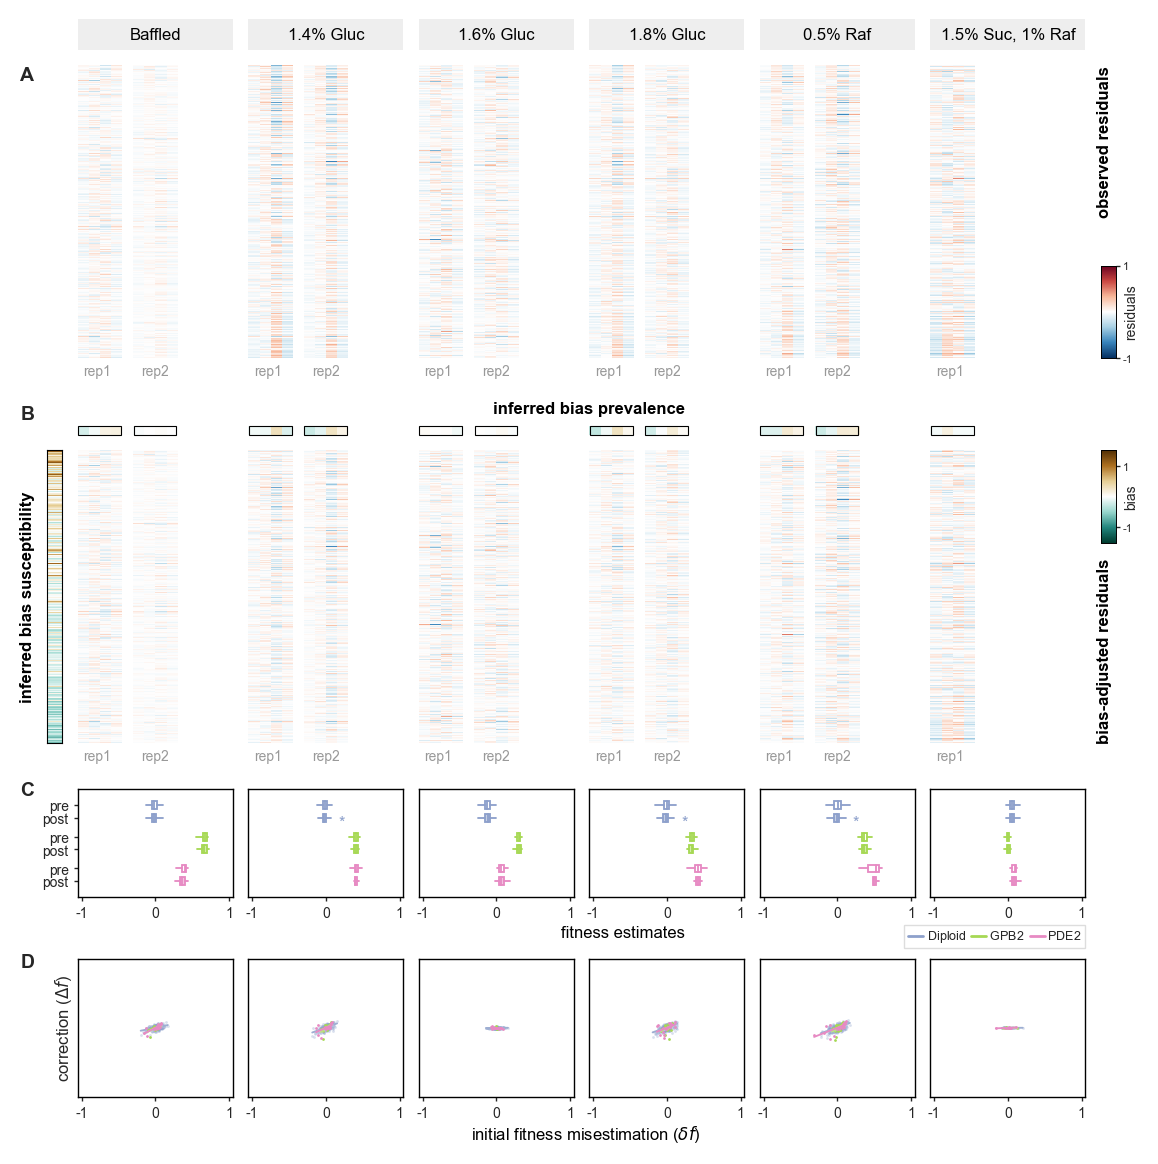

In [72]:
figsize = (7.0, 7.0) 
figSI = plt.figure(constrained_layout=True, figsize=figsize, dpi=200) # 250

gridsize = (int(figsize[0]*10), int(figsize[1]*10))
gs = figSI.add_gridspec(gridsize[1], gridsize[0], wspace=0.0, hspace=0.0, width_ratios=[1]*gridsize[1], height_ratios=[1]*gridsize[0])


grid = {'assaysetlabel': {'y0': 0,  'yf': 2},
        'residsorig':    {'y0': 3,  'yf': 22},
        'biasprev':      {'y0': 26, 'yf': 27},
        'biassusc':      {'y0': 28, 'yf': 47},
        'residsfinal':   {'y0': 28, 'yf': 47},
        'fitnessdistns': {'y0': 50, 'yf': 57},
        'fitnessdeltas': {'y0': 61, 'yf': gridsize[1]}}

# ax_wut = figSI.add_subplot(gs[0:1, 0:1])
# ax_wut2 = figSI.add_subplot(gs[1:2, 1:2])

ax_biassusc    = figSI.add_subplot(gs[grid['biassusc']['y0']:grid['biassusc']['yf'], 0:1])
 

    

# ax_cbar_biasorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:13, -1:])
ax_cbar_resids  = figSI.add_subplot(gs[16:grid['residsorig']['yf'], -2:-1])
ax_cbar_bias   = figSI.add_subplot(gs[grid['residsfinal']['y0']:34, -2:-1])
# ax_cbar_residsfinal = figSI.add_subplot(gs[39:grid['residsfinal']['yf'], -1:])


for a, assayset in enumerate(assaysets_figSI):
    print(assayset)
    
    # if(a != 0 and a != 5):
    #     continue
    
    assays_figSI_aset  = [col for col in viz_fitnesses_final['all'].columns if assayset in col]
    samples_figSI_aset = [col for col in viz_resids_final.columns if assayset in col][1:]
    print(assays_figSI_aset)
    print(len(samples_figSI_aset))
    
    col_w = 10
    col_x = 2 + (a*col_w)+(a*1)
    
    print(f"{col_x}:{col_x+col_w}")
    
    ax_assaysetlabel = figSI.add_subplot(gs[grid['assaysetlabel']['y0']:grid['assaysetlabel']['yf'], col_x:col_x+col_w])
    ax_residsorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:grid['residsorig']['yf'], col_x:col_x+col_w])
    ax_biasprev      = figSI.add_subplot(gs[grid['biasprev']['y0']:grid['biasprev']['yf'], col_x:col_x+col_w])
    ax_residsfinal   = figSI.add_subplot(gs[grid['residsfinal']['y0']:grid['residsfinal']['yf'], col_x:col_x+col_w])
    ax_fitnessdistns = figSI.add_subplot(gs[grid['fitnessdistns']['y0']:grid['fitnessdistns']['yf'], col_x:col_x+col_w])
    ax_fitnessdeltas = figSI.add_subplot(gs[grid['fitnessdeltas']['y0']:grid['fitnessdeltas']['yf']:, col_x:col_x+col_w])
    
    #--------------------
    
    ax_assaysetlabel.text(0.5, 0.5, assay_relabels[f"{assayset}"], c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)    
    ax_assaysetlabel.set_facecolor('#eee')
    ax_assaysetlabel.set_xticks([])
    ax_assaysetlabel.set_yticks([])
    for spine in ax_assaysetlabel.spines.values():
        spine.set(visible=True, lw=0, edgecolor="white")
    
    #--------------------
    
    df_residsorig = viz_resids_orig.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsorig = df_residsorig.reindex(columns=np.concatenate([df_residsorig.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsorig = sns.heatmap(ax=ax_residsorig, data=df_residsorig, cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=(a==0), cbar_ax=ax_cbar_resids, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
    
    ax_residsorig.set_xticks([])
    ax_residsorig.set_yticks([])
    
    ax_residsorig.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsorig.text(15, 0, "observed residuals", c='k', verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)    
    
    #--------------------
    
    df_biasprev = viz_biasprev_final[samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_biasprev = df_biasprev.reindex(columns=np.concatenate([df_biasprev.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_biasprev = sns.heatmap(ax=ax_biasprev, data=df_biasprev, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                              cbar=(a==0), cbar_ax=ax_cbar_bias, cbar_kws={'label':"bias", 'drawedges':False, 'ticks':[-1, 1]})
    
    ax_biasprev.set_xticks([])
    ax_biasprev.set_yticks([])
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0, 0), width=15, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(1*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(2*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    
    if(a == 3):
        ax_biasprev.text(0, -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    df_residsfinal = viz_resids_final.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsfinal = df_residsfinal.reindex(columns=np.concatenate([df_residsfinal.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsfinal = sns.heatmap(ax=ax_residsfinal, data=df_residsfinal, cmap=residCmapW, center=0, vmin=-1, vmax=1, cbar=False)
    
    ax_residsfinal.set_xticks([])
    ax_residsfinal.set_yticks([])
    
    ax_residsfinal.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 5):
        ax_residsfinal.text(15, len(viz_biassusc_final[viz_variants_GCsorted]), "bias-adjusted residuals", c='k', verticalalignment='bottom', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g = np.array([])
        viz_fitnesses_final_g = np.array([])
        for ai, assay in enumerate(assays_figSI_aset):
            viz_fitnesses_orig_g  = np.hstack([viz_fitnesses_orig_g, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g = np.hstack([viz_fitnesses_final_g, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g, viz_fitnesses_final_g).pvalue
        if(pvalue < 0.05):
            ax_fitnessdistns.text(np.percentile(viz_fitnesses_final_g, 99)+(0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g)
        boxplot_fitnesses.append(viz_fitnesses_final_g)
    
    bplot = ax_fitnessdistns.boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax_fitnessdistns.set_xlim((-1.05, 1.05))
    ax_fitnessdistns.set_xticks([-1, 0, 1])
    ax_fitnessdistns.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdistns.set_xlabel('')
    ax_fitnessdistns.set_yticks(box_positions if a==0 else []) # if c!=0 else [1, 2, 3])
    ax_fitnessdistns.set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if a==0 else [], fontsize=5) 
    ax_fitnessdistns.set_ylabel('')    
    ax_fitnessdistns.tick_params(width=0.5, length=1.33, pad=2)
    
    ax_fitnessdistns.set_facecolor('#fff')
    
    for spine in ax_fitnessdistns.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    

    
    if(a == 3):
        ax_fitnessdistns.text(-0.6, -0.835, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)

    #--------------------
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in assays_figSI_aset])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in assays_figSI_aset])
    
        sns.regplot(ax=ax_fitnessdeltas, x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    # ax_fitnessdeltas.set_xticks([])
    ax_fitnessdeltas.set_xlabel('')
    # ax_fitnessdeltas.set_yticks([])
    ax_fitnessdeltas.set_ylabel('')    
    # ax_fitnessdeltas.get_legend().remove()
    
    ax_fitnessdeltas.set_xlim((-1.05, 1.05))
    ax_fitnessdeltas.set_xticks([-1, 0, 1])
    ax_fitnessdeltas.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdeltas.set_ylim((-1.05, 1.05))
    ax_fitnessdeltas.set_yticks([-1, 0, 1] if c==0 else [])
    ax_fitnessdeltas.set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax_fitnessdeltas.tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax_fitnessdeltas.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    if(a == len(assaysets_figSI)-1):
        ax_fitnessdeltas.text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax_fitnessdeltas.plot([0.30, 0.50], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-0.5, -0.3], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-1.35, -1.15], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
            
    if(a == 0):
        ax_fitnessdeltas.set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        
    if(a == 3):
        ax_fitnessdeltas.text(-1.1, -1.6, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
    # break

    

ax_cbar_resids.set_yticks([-1, 1])
ax_cbar_resids.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_resids.set_ylabel("residuals", fontsize=5, labelpad=-3)
ax_cbar_resids.tick_params(width=0.5, length=1.33, pad=1)
ax_cbar_bias.set_yticks([-1, 1])
ax_cbar_bias.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_bias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax_cbar_bias.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax_cbar_resids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax_cbar_bias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")



sns.heatmap(ax=ax_biassusc, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax_biassusc.set_xticks([])
ax_biassusc.set_yticks([])
ax_biassusc.set_xticklabels([])
ax_biassusc.set_yticklabels([])
ax_biassusc.set_xlabel('')
ax_biassusc.set_ylabel('')
ax_biassusc.text(-1.25, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax_biassusc.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")
ax_biassusc.axis('tight')

ax_biassusc.text(-1.25, -470, "A", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, -55, "B", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 405, "C", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 615, "D", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)

plt.show()

In [73]:
figSI.savefig(f"./figures/figSI-residsfitnesses-pt2_{date}.png", dpi=300)

------

In [74]:
assaysets_figSI = ['0.2MKCl', '0.5MKCl', 'M3'] # ['Baffled', '1.4%Gluc', '1.6%Gluc', '1.8%Gluc', '0.5%Raf', '1.5%Suc1%Raf'] #, 
# assaysets_figSI = list(set([col.split('-')[0] for col in viz_fitnesses_final['all'].columns if 'EC' not in col.split('-')[0]]))[::-1]
assaysets_figSI

['0.2MKCl', '0.5MKCl', 'M3']

In [75]:
viz_assays = np.concatenate([[col for col in viz_fitnesses_orig['Diploid'].columns if assayset in col] for assayset in assaysets_figSI])
viz_assays

array(['0.2MKCl-R1', '0.5MKCl-R1', 'M3-R1', 'M3-R2', 'M3-R3', 'M3-R4'],
      dtype='<U10')

In [76]:
viz_samples = np.concatenate([[col for col in viz_resids_orig.columns if assayset in col] for assayset in assaysets_figSI])
viz_samples
print(len(viz_samples))

30


0.2MKCl
['0.2MKCl-R1']
4
2:12


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


0.5MKCl
['0.5MKCl-R1']
4
13:23


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()


M3
['M3-R1', 'M3-R2', 'M3-R3', 'M3-R4']
19
24:34


/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes size

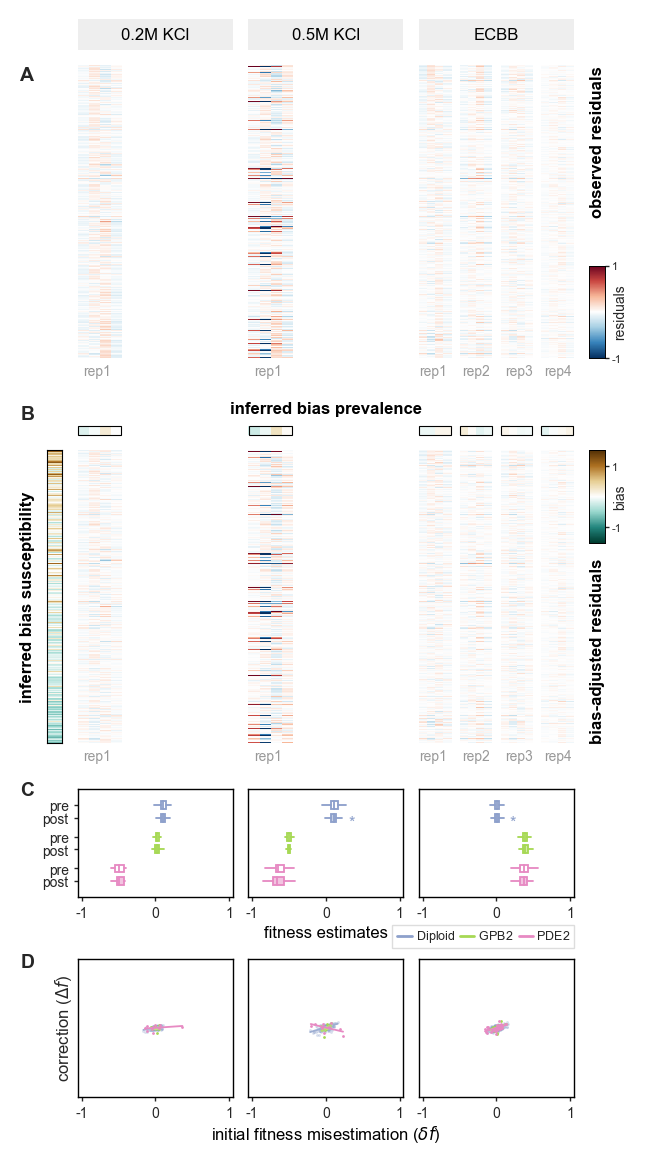

In [77]:
figsize = (7.0, 7.0) 
figSI = plt.figure(constrained_layout=True, figsize=figsize, dpi=200) # 250

gridsize = (int(figsize[0]*10), int(figsize[1]*10))
gs = figSI.add_gridspec(gridsize[1], gridsize[0], wspace=0.0, hspace=0.0, width_ratios=[1]*gridsize[1], height_ratios=[1]*gridsize[0])


grid = {'assaysetlabel': {'y0': 0,  'yf': 2},
        'residsorig':    {'y0': 3,  'yf': 22},
        'biasprev':      {'y0': 26, 'yf': 27},
        'biassusc':      {'y0': 28, 'yf': 47},
        'residsfinal':   {'y0': 28, 'yf': 47},
        'fitnessdistns': {'y0': 50, 'yf': 57},
        'fitnessdeltas': {'y0': 61, 'yf': gridsize[1]}}

# ax_wut = figSI.add_subplot(gs[0:1, 0:1])
# ax_wut2 = figSI.add_subplot(gs[1:2, 1:2])

ax_biassusc    = figSI.add_subplot(gs[grid['biassusc']['y0']:grid['biassusc']['yf'], 0:1])
 

    

# ax_cbar_biasorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:13, -1:])
ax_cbar_resids  = figSI.add_subplot(gs[16:grid['residsorig']['yf'], 35:36])
ax_cbar_bias   = figSI.add_subplot(gs[grid['residsfinal']['y0']:34, 35:36])
# ax_cbar_residsfinal = figSI.add_subplot(gs[39:grid['residsfinal']['yf'], -1:])


for a, assayset in enumerate(assaysets_figSI):
    print(assayset)
    
    # if(a != 0 and a != 5):
    #     continue
    
    assays_figSI_aset  = [col for col in viz_fitnesses_final['all'].columns if assayset in col]
    samples_figSI_aset = [col for col in viz_resids_final.columns if assayset in col][1:]
    print(assays_figSI_aset)
    print(len(samples_figSI_aset))
    
    col_w = 10
    col_x = 2 + (a*col_w)+(a*1)
    
    print(f"{col_x}:{col_x+col_w}")
    
    ax_assaysetlabel = figSI.add_subplot(gs[grid['assaysetlabel']['y0']:grid['assaysetlabel']['yf'], col_x:col_x+col_w])
    ax_residsorig    = figSI.add_subplot(gs[grid['residsorig']['y0']:grid['residsorig']['yf'], col_x:col_x+col_w])
    ax_biasprev      = figSI.add_subplot(gs[grid['biasprev']['y0']:grid['biasprev']['yf'], col_x:col_x+col_w])
    ax_residsfinal   = figSI.add_subplot(gs[grid['residsfinal']['y0']:grid['residsfinal']['yf'], col_x:col_x+col_w])
    ax_fitnessdistns = figSI.add_subplot(gs[grid['fitnessdistns']['y0']:grid['fitnessdistns']['yf'], col_x:col_x+col_w])
    ax_fitnessdeltas = figSI.add_subplot(gs[grid['fitnessdeltas']['y0']:grid['fitnessdeltas']['yf']:, col_x:col_x+col_w])
    
    #--------------------
    
    ax_assaysetlabel.text(0.5, 0.5, assay_relabels[f"{assayset}"], c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)    
    ax_assaysetlabel.set_facecolor('#eee')
    ax_assaysetlabel.set_xticks([])
    ax_assaysetlabel.set_yticks([])
    for spine in ax_assaysetlabel.spines.values():
        spine.set(visible=True, lw=0, edgecolor="white")
    
    #--------------------
    
    df_residsorig = viz_resids_orig.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsorig = df_residsorig.reindex(columns=np.concatenate([df_residsorig.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsorig = sns.heatmap(ax=ax_residsorig, data=df_residsorig, cmap=residCmapW, center=0, vmin=-1, vmax=1,  #.shift(-1, axis=1)
                                cbar=(a==0), cbar_ax=ax_cbar_resids, cbar_kws={'label':"residuals", 'drawedges':False, 'ticks':[-1, 1], 'aspect': 20})
    
    ax_residsorig.set_xticks([])
    ax_residsorig.set_yticks([])
    
    ax_residsorig.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R4' in assay for assay in assays_figSI_aset)):
        ax_residsorig.text(17., len(viz_variants_GCsorted)+7, f"rep4", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 2):
        ax_residsorig.text(21, 0, "observed residuals", c='k', verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)    
    
    #--------------------
    
    df_biasprev = viz_biasprev_final[samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_biasprev = df_biasprev.reindex(columns=np.concatenate([df_biasprev.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_biasprev = sns.heatmap(ax=ax_biasprev, data=df_biasprev, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, square=False, linewidths=0.0, linecolor='w',
                              cbar=(a==0), cbar_ax=ax_cbar_bias, cbar_kws={'label':"bias", 'drawedges':False, 'ticks':[-1, 1]})
    
    ax_biasprev.set_xticks([])
    ax_biasprev.set_yticks([])
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0, 0), width=len(samples_figSI_aset)+1, height=0.4, fc='w', ec='w', lw=0.0, clip_on=False, zorder=99))
    ax_biasprev.add_patch(mpatches.Rectangle(xy=(0*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(1*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(2*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    if(any('R4' in assay for assay in assays_figSI_aset)):
        ax_biasprev.add_patch(mpatches.Rectangle(xy=(3*(14+1)/3+0.02, 0.405), width=((14+1)/3 - 1)*0.97, height=1-0.405, fc='#ffffff00', ec='k', lw=0.4, clip_on=False, zorder=99))    
    
    if(a == 1):
        ax_biasprev.text(7., -0.7, "inferred bias prevalence", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    df_residsfinal = viz_resids_final.loc[viz_variants_GCsorted, samples_figSI_aset]
    if(len(samples_figSI_aset) < 14):
        df_residsfinal = df_residsfinal.reindex(columns=np.concatenate([df_residsfinal.columns, ['empty']*int(14-len(samples_figSI_aset))]))
    hm_residsfinal = sns.heatmap(ax=ax_residsfinal, data=df_residsfinal, cmap=residCmapW, center=0, vmin=-1, vmax=1, cbar=False)
    
    ax_residsfinal.set_xticks([])
    ax_residsfinal.set_yticks([])
    
    ax_residsfinal.text(2.75 if len(samples_figSI_aset) == 14 else 1.75, len(viz_variants_GCsorted)+7, f"rep1", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R2' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(7, len(viz_variants_GCsorted)+7, f"rep2", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R3' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(12.25, len(viz_variants_GCsorted)+7, f"rep3", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    if(any('R4' in assay for assay in assays_figSI_aset)):
        ax_residsfinal.text(17., len(viz_variants_GCsorted)+7, f"rep4", c='#999', verticalalignment='top', horizontalalignment='center', rotation=0, fontsize=5, zorder=100)
    
    if(a == 2):
        ax_residsfinal.text(21, len(viz_biassusc_final[viz_variants_GCsorted]), "bias-adjusted residuals", c='k', verticalalignment='bottom', horizontalalignment='left', rotation=90, fontsize=6, weight='bold', zorder=100)
    
    #--------------------
    
    boxplot_fitnesses = []
    
    box_positions = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
    
    for g, group in enumerate(vizGroups_fig4B):
        viz_fitnesses_orig_g = np.array([])
        viz_fitnesses_final_g = np.array([])
        for ai, assay in enumerate(assays_figSI_aset):
            viz_fitnesses_orig_g  = np.hstack([viz_fitnesses_orig_g, viz_fitnesses_orig[group].loc[:, assay].values])
            viz_fitnesses_final_g = np.hstack([viz_fitnesses_final_g, viz_fitnesses_final[group].loc[:, assay].values])
            
        pvalue = scipy.stats.levene(viz_fitnesses_orig_g, viz_fitnesses_final_g).pvalue
        if(pvalue < 0.05):
            ax_fitnessdistns.text(np.percentile(viz_fitnesses_final_g, 99)+(0.125), box_positions[::-1][2*g+1]-0.15, "*", verticalalignment='center', horizontalalignment='center', fontsize=6, color=groups_colors[group])
            
        boxplot_fitnesses.append(viz_fitnesses_orig_g)
        boxplot_fitnesses.append(viz_fitnesses_final_g)
    
    bplot = ax_fitnessdistns.boxplot(boxplot_fitnesses[::-1], vert=False, positions=box_positions, widths=0.25, showcaps=False, showfliers=False, patch_artist=True,
                                boxprops=dict(linewidth=0.66, facecolor='r'), whiskerprops=dict(linewidth=0.66), medianprops=dict(linewidth=0.66))
    
    boxshadealpha = 0.5
    for i, patch in enumerate(bplot['boxes'][::-1]):
        patch.set_facecolor(list(groups_colors[vizGroups_fig4B[int(i/2)]])+[boxshadealpha*(i%2)])
        patch.set_edgecolor(groups_colors[vizGroups_fig4B[int(i/2)]])
    for i, patch in enumerate(bplot['whiskers'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/4)]])
    for i, patch in enumerate(bplot['medians'][::-1]):
        patch.set_color(groups_colors[vizGroups_fig4B[int(i/2)]])
    
    ax_fitnessdistns.set_xlim((-1.05, 1.05))
    ax_fitnessdistns.set_xticks([-1, 0, 1])
    ax_fitnessdistns.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdistns.set_xlabel('')
    ax_fitnessdistns.set_yticks(box_positions if a==0 else []) # if c!=0 else [1, 2, 3])
    ax_fitnessdistns.set_yticklabels(['pre', 'post', 'pre', 'post', 'pre', 'post'][::-1] if a==0 else [], fontsize=5) 
    ax_fitnessdistns.set_ylabel('')    
    ax_fitnessdistns.tick_params(width=0.5, length=1.33, pad=2)
    
    ax_fitnessdistns.set_facecolor('#fff')
    
    for spine in ax_fitnessdistns.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    

    
    if(a == 1):
        ax_fitnessdistns.text(-0., -0.835, "fitness estimates", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)

    #--------------------
    
    for g, group in enumerate(['Diploid', 'GPB2', 'PDE2']):
        
        viz_fEpsilons_g_allReps = np.concatenate([viz_fEpsilons[group].loc[:, assay].values for assay in assays_figSI_aset])
        viz_fDeltas_g_allReps   = np.concatenate([viz_fDeltas[group].loc[:, assay].values for assay in assays_figSI_aset])
    
        sns.regplot(ax=ax_fitnessdeltas, x=viz_fEpsilons_g_allReps, y=-1*viz_fDeltas_g_allReps, ci=0, 
                    color=groups_colors[group], marker=('o' if 'Diploid' in group else 'o'), label=f"{group}", 
                    scatter_kws={'alpha': 0.33 if group=='Diploid' else 1.0, 's': 1, 'lw': 0, 'zorder': g}, line_kws={'lw': 0.66, 'zorder': g})
        
    # ax_fitnessdeltas.set_xticks([])
    ax_fitnessdeltas.set_xlabel('')
    # ax_fitnessdeltas.set_yticks([])
    ax_fitnessdeltas.set_ylabel('')    
    # ax_fitnessdeltas.get_legend().remove()
    
    ax_fitnessdeltas.set_xlim((-1.05, 1.05))
    ax_fitnessdeltas.set_xticks([-1, 0, 1])
    ax_fitnessdeltas.set_xticklabels([-1, 0, 1], fontsize=5)
    ax_fitnessdeltas.set_ylim((-1.05, 1.05))
    ax_fitnessdeltas.set_yticks([-1, 0, 1] if c==0 else [])
    ax_fitnessdeltas.set_yticklabels([-1, 0, 1] if c==0 else [], fontsize=5)
    
    ax_fitnessdeltas.tick_params(width=0.5, length=1.33, pad=2)
    
    for spine in ax_fitnessdeltas.spines.values():
        spine.set_edgecolor('#000')
        spine.set_linewidth(0.5)
    
    if(a == len(assaysets_figSI)-1):
        ax_fitnessdeltas.text(1.0, 1.39, "$~~~~~$Diploid$~~~~~~$GPB2$~~~~~~$PDE2", verticalalignment='center', horizontalalignment='right', fontsize=4.5, zorder=100, bbox=dict(pad=1.25, fc='w', ec='#ddd', lw=0.5), clip_on=False)
        ax_fitnessdeltas.plot([0.30, 0.50], [1.39, 1.39], c=groups_colors['PDE2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-0.5, -0.3], [1.39, 1.39], c=groups_colors['GPB2'], lw=1, zorder=200, clip_on=False)
        ax_fitnessdeltas.plot([-1.35, -1.15], [1.39, 1.39], c=groups_colors['Diploid'], lw=1, zorder=200, clip_on=False)
            
    if(a == 0):
        ax_fitnessdeltas.set_ylabel("correction ($\Delta f$)", labelpad=0, fontsize=6)        
    if(a == 1):
        ax_fitnessdeltas.text(0, -1.6, "initial fitness misestimation ($\delta f$)", c='k', verticalalignment='center', horizontalalignment='center', rotation=0, fontsize=6, zorder=100)
    
    # break

    

ax_cbar_resids.set_yticks([-1, 1])
ax_cbar_resids.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_resids.set_ylabel("residuals", fontsize=5, labelpad=-3)
ax_cbar_resids.tick_params(width=0.5, length=1.33, pad=1)
ax_cbar_bias.set_yticks([-1, 1])
ax_cbar_bias.set_yticklabels([-1, 1], fontsize=4)
ax_cbar_bias.set_ylabel("bias", fontsize=5, labelpad=-3)
ax_cbar_bias.tick_params(width=0.5, length=1.33, pad=1)
for spine in ax_cbar_resids.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")
for spine in ax_cbar_bias.spines.values():
    spine.set(visible=True, lw=.3, edgecolor="black")



sns.heatmap(ax=ax_biassusc, data=np.atleast_2d(viz_biassusc_final[viz_variants_GCsorted]).T, cmap=biasCmapW, center=0, vmin=-1.5, vmax=1.5, cbar=False)
ax_biassusc.set_xticks([])
ax_biassusc.set_yticks([])
ax_biassusc.set_xticklabels([])
ax_biassusc.set_yticklabels([])
ax_biassusc.set_xlabel('')
ax_biassusc.set_ylabel('')
ax_biassusc.text(-1.25, len(viz_biassusc_final[viz_variants_GCsorted])/2, "inferred bias susceptibility", c='k', verticalalignment='center', horizontalalignment='center', rotation=90, fontsize=6, weight='bold', zorder=100)
for spine in ax_biassusc.spines.values():
    spine.set(visible=True, lw=.4, edgecolor="black")
ax_biassusc.axis('tight')

ax_biassusc.text(-1.25, -470, "A", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, -55, "B", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 405, "C", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)
ax_biassusc.text(-1.25, 615, "D", verticalalignment='top', horizontalalignment='center', fontsize=7, weight='bold', rotation=0)

plt.show()

In [78]:
figSI.savefig(f"./figures/figSI-residsfitnesses-pt3_{date}.png", dpi=300)

------

In [79]:
viz_assays = [  'EC23-R1', 'EC23-R2', 'EC23-R3', 
                'EC21-R1', 'EC21-R2', 'EC21-R3',
                'EC20-R1', 'EC20-R2', 'EC20-R3', 
                'EC18-R1', 'EC18-R2', 'EC18-R3',
                'EC13-R1', 'EC13-R2', 'EC13-R3', 
                'EC3-R1', 'EC3-R2', 'EC3-R3',
                'Baffled-R1', 'Baffled-R2',
                '1.4%Gluc-R1', '1.4%Gluc-R2',
                '1.6%Gluc-R1', '1.6%Gluc-R2',
                '1.8%Gluc-R1', '1.8%Gluc-R2', 
                '0.5%Raf-R1', '0.5%Raf-R2',
                '1.5%Suc1%Raf-R1', 
                '0.2MKCl-R1',
                '0.5MKCl-R1',
                'M3-R1', 'M3-R2', 'M3-R3', 'M3-R4' ]
viz_assays

['EC23-R1',
 'EC23-R2',
 'EC23-R3',
 'EC21-R1',
 'EC21-R2',
 'EC21-R3',
 'EC20-R1',
 'EC20-R2',
 'EC20-R3',
 'EC18-R1',
 'EC18-R2',
 'EC18-R3',
 'EC13-R1',
 'EC13-R2',
 'EC13-R3',
 'EC3-R1',
 'EC3-R2',
 'EC3-R3',
 'Baffled-R1',
 'Baffled-R2',
 '1.4%Gluc-R1',
 '1.4%Gluc-R2',
 '1.6%Gluc-R1',
 '1.6%Gluc-R2',
 '1.8%Gluc-R1',
 '1.8%Gluc-R2',
 '0.5%Raf-R1',
 '0.5%Raf-R2',
 '1.5%Suc1%Raf-R1',
 '0.2MKCl-R1',
 '0.5MKCl-R1',
 'M3-R1',
 'M3-R2',
 'M3-R3',
 'M3-R4']

In [84]:
def linear_regression(x, y, w=None):
    xw = w*x if w is not None else x
    yw = w*y if w is not None else y
    if(not np.any(yw)):
        slope     = 0
        intercept = 0
    else:
        n = len(x)
        xw_mean = np.sum(xw)/n
        yw_mean = np.sum(yw)/n
        w_mean  = np.sum(w)/n if w is not None else 1
        slope     = np.sum(xw * (y - yw_mean/w_mean)) / np.sum(xw * (x - xw_mean/w_mean))
        intercept = (1/w_mean)*(yw_mean - slope*xw_mean)
    return slope, intercept

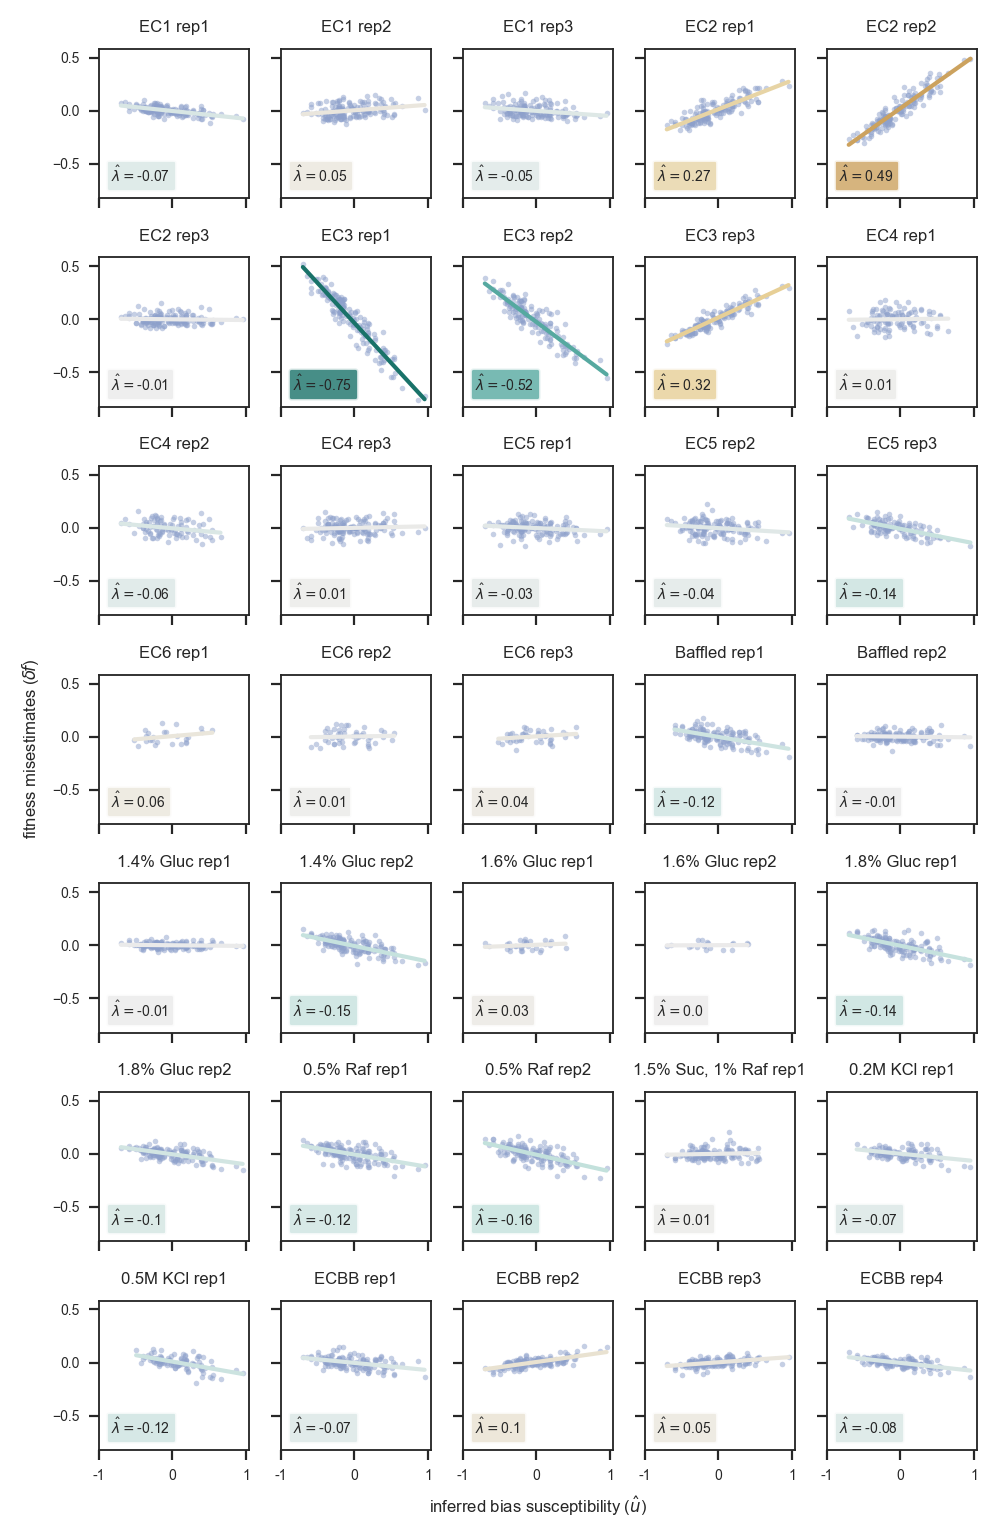

In [85]:
figSI, ax = plt.subplots(7, 5, sharex=True, sharey=True, figsize=(5.0, 7.7), dpi=200)

biassusc_allVariants = viz_variantsInfo.loc[:, 'bias_susceptibility'].values
    
controlVariants = viz_variantsInfo[viz_variantsInfo['control_set'] == True].index.values
    
for a, assay in enumerate(viz_assays):
    # print(a, a//5, a%5, assay)
    r = a//5
    c = a%5
    
    assayInfo  = viz_samplesInfo.loc[(viz_samplesInfo['assay'] == assay) & (~viz_samplesInfo['timept'].isin(viz_config['exclude_timepts']))].sort_values(by='timept')
    samples_a  = assayInfo['sample'].unique()
    timepts_a  = assayInfo['timept'].values
    biasprev_a = assayInfo['bias_prevalence'].values

    trustworthyVariants_a = np.where(viz_trustworthy[assay]==True)[0]
    trustworthyControlVariants_a = list(set(controlVariants).intersection(trustworthyVariants_a))

    biassusc_a = biassusc_allVariants[trustworthyControlVariants_a]

    fitnesses_endstage1 = pd.read_csv('./results/fitnesses_stage1-iter5.csv')
    fitnesses_controlSet_a  = fitnesses_endstage1.loc[trustworthyControlVariants_a, assay].values

    #----

    delta_f_a = fitnesses_controlSet_a - fitnesses_controlSet_a.mean() # fitness misestimates among control set

    lambda_a, v_intcpt_a = linear_regression(x=biassusc_a, y=delta_f_a)     

    #---------------------------

    ax[a//5, a%5].scatter(biassusc_a, delta_f_a, s=4, alpha=0.5, color=groups_colors['Diploid'], linewidth=0)
    lambda_color = biasCmapG(biasCmapG_norm(-lambda_a))
    ax[a//5, a%5].plot(np.sort(biassusc_a), lambda_a*np.sort(biassusc_a) + v_intcpt_a, color=lambda_color, label="$\hat{\lambda} = $"+f"{round(lambda_a, 2)}")

    leg = ax[a//5, a%5].legend(handlelength=0, handletextpad=0, fancybox=True, prop={'size': 5}, loc='lower left')
    for item in leg.legendHandles:
        item.set_visible(False)
    leg.get_frame().set_facecolor(lambda_color)
    leg.get_frame().set_edgecolor(None)

    ax[r, c].set_xticks([-1, 0, 1])
    ax[r, c].set_xticklabels([-1, 0, 1], fontsize=5)
    ax[r, c].set_yticks([-0.5, 0, 0.5])
    ax[r, c].set_yticklabels(["−0.5", "0.0", "0.5"], fontsize=5)
    
    if(r == 3 and c == 0):
        ax[r, c].set_ylabel("fitness misestimates ($\delta\!f$)", fontsize=6)
    if(r == 6 and c == 2):
        ax[r, c].set_xlabel("inferred bias susceptibility ($\hat{u}$)", fontsize=6)
        
    ax[r, c].set_title(assay_relabels[assay.split('-')[0]]+" rep"+assay[-1], fontsize=6)
    
    
figSI.tight_layout()

plt.show()
    
    

In [86]:
figSI.savefig(f"./figures/figSI-stage2lambdas_{date}.png", dpi=300)

----------

[ 37 417 246 354 229 398 342 228]


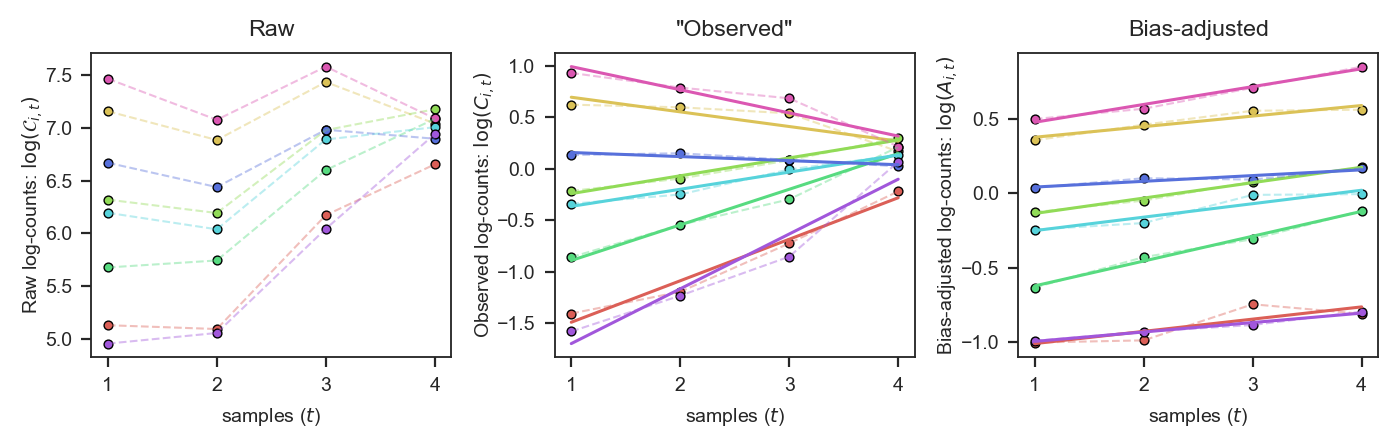

In [87]:
figSI, ax = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(7.0, 2.25), dpi=200)

biassusc_allVariants = viz_variantsInfo.loc[:, 'bias_susceptibility'].values
    
controlVariants = viz_variantsInfo[viz_variantsInfo['control_set'] == True].index.values
    
for a, assay in enumerate(['EC21-R2']):
    
    assayInfo  = viz_samplesInfo.loc[(viz_samplesInfo['assay'] == assay) & (~viz_samplesInfo['timept'].isin(viz_config['exclude_timepts']))].sort_values(by='timept')
    samples_a  = assayInfo['sample'].unique()
    timepts_a  = assayInfo['timept'].values
    biasprev_a = assayInfo['bias_prevalence'].values
    baseline_a = assayInfo['normalization_factor'].values
    
    trustworthyVariants_a = np.where(viz_trustworthy[assay]==True)[0]
    trustworthyControlVariants_a = list(set(controlVariants).intersection(trustworthyVariants_a))
    np.random.seed(285) # 285 568 42 : 7 > 3/5/6 > 2 > 1
    viz_variants = np.random.choice(trustworthyControlVariants_a, size=8)
    print(viz_variants)
    
    biassusc_a = biassusc_allVariants[viz_variants]
    
    #--------------------
    
    counts_raw = viz_counts.loc[viz_variants, samples_a].values
    
    counts_obs = counts_raw/baseline_a
    
    counts_adj = (counts_raw/baseline_a)*np.exp(biassusc_a[:, np.newaxis] * biasprev_a[np.newaxis, :])

    #--------------------
    
    palette = sns.color_palette('hls', len(viz_variants))
    
    for i, counts_raw_i in enumerate(counts_raw):
        
        ax[0].set_title("Raw")
        
        ax[0].plot(timepts_a, np.log(counts_raw_i), color=palette[i], ls='--', lw=0.75, alpha=0.4)
        
        ax[0].scatter(timepts_a, np.log(counts_raw_i), color=palette[i], s=10, edgecolor='k', linewidth=0.5)
        
        ax[0].set_ylabel('Raw log-counts: $\\log(\\mathcal{C}_{i,t})$', labelpad=0)
        ax[0].set_xlabel('samples ($t$)')        
    
    for i, counts_obs_i in enumerate(counts_obs):
        
        ax[1].set_title("\"Observed\"")
        
        ax[1].plot(timepts_a, np.log(counts_obs_i), color=palette[i], ls='--', lw=0.75, alpha=0.4)
        
        ax[1].scatter(timepts_a, np.log(counts_obs_i), color=palette[i], s=10, edgecolor='k', linewidth=0.5)
        
        slope_i, intcpt_i = linear_regression(x=timepts_a, y=np.log(counts_obs_i))
        ax[1].plot(timepts_a, slope_i*timepts_a + intcpt_i, color=palette[i], ls='-', lw=1.1)
        
        ax[1].set_ylabel('Observed log-counts: $\\log({C}_{i,t})$', labelpad=0)
        ax[1].set_xlabel('samples ($t$)')        
        
    for i, counts_adj_i in enumerate(counts_adj):
        
        ax[2].set_title("Bias-adjusted")
        
        ax[2].plot(timepts_a, np.log(counts_adj_i), color=palette[i], ls='--', lw=0.75, alpha=0.4)
        
        ax[2].scatter(timepts_a, np.log(counts_adj_i), color=palette[i], s=10, edgecolor='k', linewidth=0.5)
        
        slope_i, intcpt_i = linear_regression(x=timepts_a, y=np.log(counts_adj_i))
        ax[2].plot(timepts_a, slope_i*timepts_a + intcpt_i, color=palette[i], ls='-', lw=1.1)
        
        ax[2].set_ylabel('Bias-adjusted log-counts: $\\log({A}_{i,t})$', labelpad=0)
        ax[2].set_xlabel('samples ($t$)')
    
    
figSI.tight_layout()

plt.show()
    
    

In [89]:
figSI.savefig(f"./figures/figSI-countsrawobsadj_{date}.png", dpi=300)

-----------